In [134]:
from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [220]:
import sklearn
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
sklearn.__version__

'1.6.1'

DIVISION DEL DATASET EN TRAIN/TEST

In [251]:
# Dividimos los datos en entrenamiento y test (80% training, 20% test)
#asegurarse de que no analizamos ni vemos el test set
#hacer las pequeñas modificaciones necsesarias por ser un CSV

with open("./airbnb-listings-extract.csv", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())


import pandas as pd
from sklearn.model_selection import train_test_split


file_path = "./airbnb-listings-extract.csv"
full_df = pd.read_csv(
    file_path,
    sep=';',
    quotechar='"',
    engine='python'
)


train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')



train.to_csv('./airbnb-train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb-test.csv', sep=';', decimal='.', index=False)


bronze_data = pd.read_csv('./airbnb-train.csv', sep=';', quotechar='"', engine='python', decimal='.')
print(bronze_data.head(5).T)



ID;Listing Url;Scrape ID;Last Scraped;Name;Summary;Space;Description;Experiences Offered;Neighborhood Overview;Notes;Transit;Access;Interaction;House Rules;Thumbnail Url;Medium Url;Picture Url;XL Picture Url;Host ID;Host URL;Host Name;Host Since;Host Location;Host About;Host Response Time;Host Response Rate;Host Acceptance Rate;Host Thumbnail Url;Host Picture Url;Host Neighbourhood;Host Listings Count;Host Total Listings Count;Host Verifications;Street;Neighbourhood;Neighbourhood Cleansed;Neighbourhood Group Cleansed;City;State;Zipcode;Market;Smart Location;Country Code;Country;Latitude;Longitude;Property Type;Room Type;Accommodates;Bathrooms;Bedrooms;Beds;Bed Type;Amenities;Square Feet;Price;Weekly Price;Monthly Price;Security Deposit;Cleaning Fee;Guests Included;Extra People;Minimum Nights;Maximum Nights;Calendar Updated;Has Availability;Availability 30;Availability 60;Availability 90;Availability 365;Calendar last Scraped;Number of Reviews;First Review;Last Review;Review Scores Rati

EXPLORACION DE DATOS
Siendo un conjunto de datos real, nos encontramos ante un extensa fase de exploracion , limpieza y filtrado.En mi caso , este Notebook que remito es 3 dado que en las fases de exploracion realice demasiadas exclusiones de variables categoricas y el modelo en su resultado final era demasiado pobre al tener tan solo 4-5 variables relevantes. Siguiendo la propuesta de ir de menos a mas en la simplicidad del desarrollo del problema, he tenido que desechar mis dos intentos inciales al no generar un dataset lo suficiente complejo para predecir .

Analisis de las variables y tipos

In [252]:
bronze_data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [253]:
print(bronze_data.dtypes.to_string())



ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [254]:
#Hacemos impresion por tipo de datos
object_cols = bronze_data.select_dtypes(include='object').columns.tolist()
print("Columnas tipo object (texto):", object_cols)
numeric_cols = bronze_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas numéricas:", numeric_cols)
date_cols = bronze_data.select_dtypes(include='datetime64[ns]').columns.tolist()
print("Columnas tipo fecha:", date_cols)


Columnas tipo object (texto): ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Cancellation Policy', 'Geolocation', 'Features']
Columnas numéricas: ['ID', 'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Co

Estudio de los valores NULL

In [255]:

nulls = bronze_data.isnull().sum()


nulls = nulls[nulls > 0].sort_values(ascending=False)


dtypes = bronze_data.dtypes[nulls.index]


nulls_df = pd.DataFrame({
    'Tipo de dato': dtypes,
    'Valores Nulos': nulls,
    '% del total': (nulls / len(bronze_data) * 100).round(2)
})

print("Columnas con valores nulos y sus tipos de datos:")
print(nulls_df)


Columnas con valores nulos y sus tipos de datos:
                               Tipo de dato  Valores Nulos  % del total
Has Availability                     object          11815        99.92
Host Acceptance Rate                 object          11794        99.75
Jurisdiction Names                   object          11650        98.53
License                              object          11547        97.66
Square Feet                         float64          11350        95.99
Monthly Price                       float64           8955        75.74
Weekly Price                        float64           8943        75.63
Notes                                object           7281        61.58
Security Deposit                    float64           6772        57.27
Interaction                          object           5232        44.25
Access                               object           5161        43.65
Cleaning Fee                        float64           4850        41.02
Transit        

Variables sin NULL

In [256]:

null_counts = bronze_data.isnull().sum()


no_nulls = null_counts[null_counts == 0]


dtypes_no_nulls = bronze_data.dtypes[no_nulls.index]


no_nulls_df = pd.DataFrame({
    'Tipo de dato': dtypes_no_nulls,
    'Valores Nulos': 0,
    '% del total': 0.0
})

print("Columnas SIN valores nulos:")
print(no_nulls_df)

Columnas SIN valores nulos:
                       Tipo de dato  Valores Nulos  % del total
ID                            int64              0          0.0
Listing Url                  object              0          0.0
Scrape ID                     int64              0          0.0
Last Scraped                 object              0          0.0
Experiences Offered          object              0          0.0
Host ID                       int64              0          0.0
Host URL                     object              0          0.0
Street                       object              0          0.0
Neighbourhood Cleansed       object              0          0.0
Smart Location               object              0          0.0
Country Code                 object              0          0.0
Latitude                    float64              0          0.0
Longitude                   float64              0          0.0
Property Type                object              0          0.0
Room Type   

Analisis de valores de Country y City para evaluar que mercado y plaza elegir priorizando por volumen de datos 

In [257]:

country_counts = bronze_data['Country'].value_counts(dropna=False)
country_percent = (country_counts / len(bronze_data) * 100).round(2)


country_df = pd.DataFrame({
    'Frecuencia': country_counts,
    'Porcentaje (%)': country_percent
})

print(" Distribución de valores en la columna 'country':")
print(country_df)

 Distribución de valores en la columna 'country':
                Frecuencia  Porcentaje (%)
Country                                   
Spain                11203           94.75
United States          139            1.18
United Kingdom         127            1.07
France                  87            0.74
Italy                   61            0.52
Australia               38            0.32
Ireland                 34            0.29
Germany                 33            0.28
Austria                 26            0.22
Netherlands             19            0.16
Belgium                 16            0.14
Canada                  16            0.14
Denmark                 14            0.12
Switzerland              4            0.03
Greece                   3            0.03
Hong Kong                2            0.02
NaN                      1            0.01
Cuba                     1            0.01


evaluacion de valores de ciudad 

In [258]:

city_counts = bronze_data['City'].value_counts(dropna=False)
city_percent = (city_counts / len(bronze_data) * 100).round(2)


city_df = pd.DataFrame({
    'Frecuencia': city_counts,
    'Porcentaje (%)': city_percent
})

print(" Distribución de valores en la columna 'City':")
print(city_df)

 Distribución de valores en la columna 'City':
                                     Frecuencia  Porcentaje (%)
City                                                           
Madrid                                    10567           89.37
Barcelona                                   235            1.99
London                                      104            0.88
Paris                                        85            0.72
Palma                                        44            0.37
马德里                                          43            0.36
Roma                                         33            0.28
Berlin                                       32            0.27
Alcúdia                                      31            0.26
Dublin                                       29            0.25
New York                                     27            0.23
Los Angeles                                  26            0.22
Brooklyn                                     22          

PLANTEAMIENTO DEL PROBLEMA
Una vez visto el Dataset, opto inicialmente por plantear un problema de regresion lineal.Considerando que la mayoria de los valores corresponden a Pais España y la ciudad de Madrid vamos a considerar solo la informacion correspondiente a este pais y ciudad para generar el modelo predictivo. 

Analizamos la variable objetivo Prize puesto que se intuye una importante dispersion en sus valores 

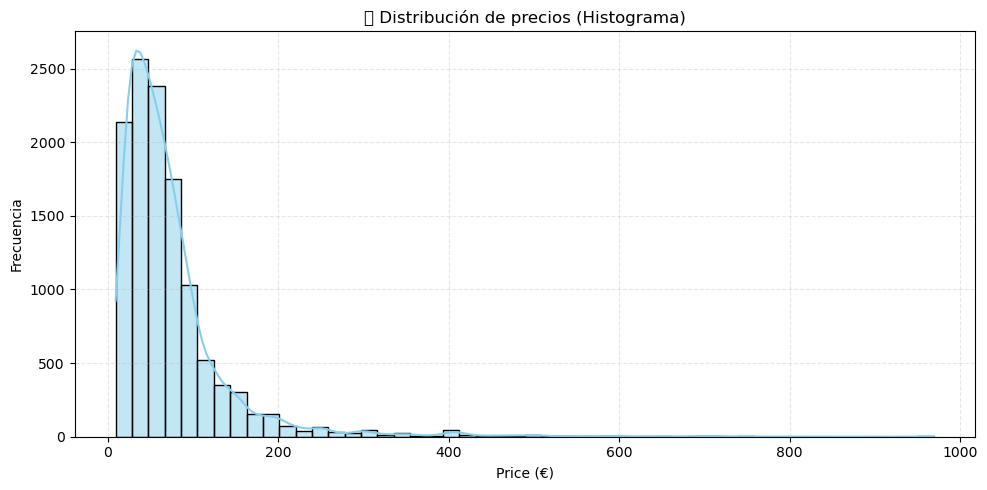

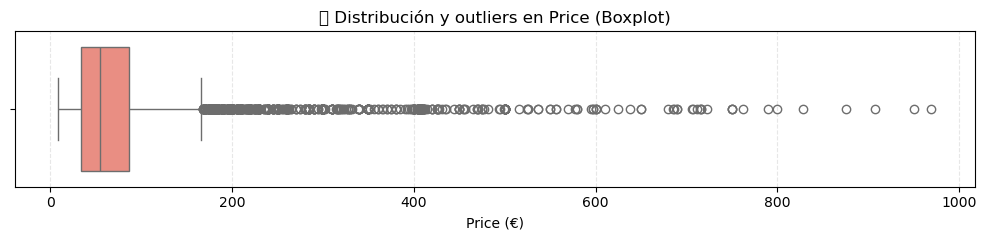

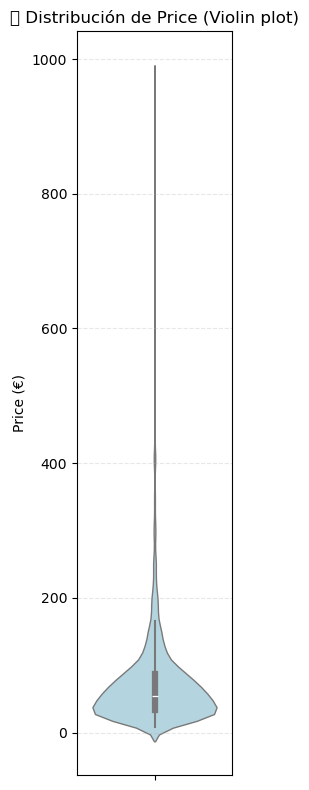

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
sns.histplot(bronze_data['Price'], bins=50, kde=True, color='skyblue')
plt.title('📊 Distribución de precios (Histograma)')
plt.xlabel('Price (€)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 2.5))
sns.boxplot(data=bronze_data, x='Price', color='salmon')
plt.title('📦 Distribución y outliers en Price (Boxplot)')
plt.xlabel('Price (€)')
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(2.5, 8))  
sns.violinplot(data=bronze_data, y='Price', color='lightblue', linewidth=1)

plt.title('🎻 Distribución de Price (Violin plot)')
plt.ylabel('Price (€)')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()




Encontramos un importante numero de Outliner que pueden distorsionar de manera elevada la capacidad predictiva 

In [260]:

price_stats = bronze_data['Price'].describe(percentiles=[0.25, 0.5, 0.75]).round(2)

iqr = price_stats['75%'] - price_stats['25%']

print("Estadísticas de 'Price':")
print(price_stats)
print(f"\n IQR (Q3 - Q1): {iqr}")
print(f" Limite superior típico (Q3 + 1.5×IQR): {price_stats['75%'] + 1.5 * iqr}")
print(f" Limite inferior típico (Q1 - 1.5×IQR): {price_stats['25%'] - 1.5 * iqr}")


Estadísticas de 'Price':
count    11809.00
mean        73.71
std         71.62
min          9.00
25%         34.00
50%         55.00
75%         87.00
max        969.00
Name: Price, dtype: float64

 IQR (Q3 - Q1): 53.0
 Limite superior típico (Q3 + 1.5×IQR): 166.5
 Limite inferior típico (Q1 - 1.5×IQR): -45.5


In [261]:

total_antes = bronze_data.shape[0]
print(f" Registros originales: {total_antes}")

#valores de 'Price' ≤ 350 €
bronze_data = bronze_data[bronze_data['Price'] <= 350].copy()

# eliminaron
total_despues = bronze_data.shape[0]
print(f" Registros tras eliminar outliers (Price > 350): {total_despues}")
print(f" Registros eliminados: {total_antes - total_despues}")


 Registros originales: 11824
 Registros tras eliminar outliers (Price > 350): 11655
 Registros eliminados: 169


HACEMOS TRANSFORCIONES EN COLUMNAS PARA TENER EL MAXIMO DE VARIABLES UTILES PARA EL APRENDIZAJE 

INICIAMOS LAS TRANSFORMACIONES NECESARIAS DE LAS VARIABLES CATEGORICAS CON EL FIN DE ENRIQUECEER LO MAXIMO POSIBLE NUESTRO DATASET
Existen multiples posibilidades posteriormente de eliminar y filtrar aquellas que veamos que son irrelevantes. A priori no descarto practicamente ninguna puesto que en las experiencias anteriores descarte bastantes por considerarlas que no cumplian con criterios de negocio o de calidad del dato.

In [262]:
#Conversion a float de la variable objetivo HOST RESPONSE RATE

if 'Host Response Rate' not in bronze_data.columns:
    raise KeyError(" La columna 'Host Response Rate' no existe en el DataFrame.")

print(f"🔍 Tipo original: {bronze_data['Host Response Rate'].dtype}")


bronze_data['Host Response Rate'] = bronze_data['Host Response Rate'].replace(['None', 'nan', 'NaN'], np.nan)


bronze_data['Host Response Rate'] = bronze_data['Host Response Rate'].astype(str).str.replace('%', '', regex=False)


bronze_data['Host Response Rate'] = pd.to_numeric(bronze_data['Host Response Rate'], errors='coerce')
bronze_data['Host Response Rate'] = bronze_data['Host Response Rate'].round().astype('Int64') 


print(f" Tipo convertido: {bronze_data['Host Response Rate'].dtype}")
print(" Valores únicos (limpieza de ejemplo):")
print(bronze_data['Host Response Rate'].dropna().unique())


🔍 Tipo original: float64
 Tipo convertido: Int64
 Valores únicos (limpieza de ejemplo):
<IntegerArray>
[100,  97,  89,  79,  94,  80,   0,  99,  90,  83,  98,  33,  86,  91,  87,
  73,  72,  75,  88,  93,  70,  50,  96,  92,  40,  25,  64,  95,  55,  57,
  67,  85,  65,  60,  69,  46,  76,  24,  29,  78,  30,  82,  20,  42,  71,
  81,  61,  47,  43,  63,  26,  35,  84,  59,  77,   9,  56,  41,  28,  68,
  62,  10,  27,  13,  74,  11,  54]
Length: 67, dtype: Int64


In [264]:
#Conversion a float las variables de thumbnail y XL picture siendo valores binarios 


cols_url = ['Thumbnail Url', 'XL Picture Url']


for col in cols_url:
    binary_col = col.replace(' ', '_') + '_bin' 
    bronze_data[binary_col] = bronze_data[col].notnull().astype(int)


print("Nuevas columnas binarias creadas:")
for col in cols_url:
    binary_col = col.replace(' ', '_') + '_bin'
    counts = bronze_data[binary_col].value_counts().sort_index()
    print(f" {binary_col}:")
    print(f"   0 = sin URL:  {counts.get(0, 0)}")
    print(f"   1 = con URL: {counts.get(1, 0)}")





Nuevas columnas binarias creadas:
 Thumbnail_Url_bin:
   0 = sin URL:  2245
   1 = con URL: 9410
 XL_Picture_Url_bin:
   0 = sin URL:  2245
   1 = con URL: 9410


In [265]:
#Conversion de la variable 'Reviews per Month' a float

if 'Reviews per Month' not in bronze_data.columns:
    raise KeyError(" La columna 'Reviews per Month' no existe en el DataFrame.")

print(f" Tipo original: {bronze_data['Reviews per Month'].dtype}")


bronze_data['Reviews per Month'] = bronze_data['Reviews per Month'].replace(['None', 'nan', 'NaN'], np.nan)


bronze_data['Reviews per Month'] = pd.to_numeric(bronze_data['Reviews per Month'], errors='coerce')


print(f"Tipo convertido: {bronze_data['Reviews per Month'].dtype}")
print("Valores no nulos únicos (ejemplo):")
print(bronze_data['Reviews per Month'].dropna().unique()[:10])  


 Tipo original: float64
Tipo convertido: float64
Valores no nulos únicos (ejemplo):
[0.5  2.43 2.08 1.4  1.61 0.61 0.12 4.57 1.65 2.2 ]


In [266]:
#Conversion a float de la variable review scores rating

if 'Review Scores Rating' not in bronze_data.columns:
    raise KeyError(" La columna 'Review Scores Rating' no existe en el DataFrame.")

print(f" Tipo original: {bronze_data['Review Scores Rating'].dtype}")


bronze_data['Review Scores Rating'] = bronze_data['Review Scores Rating'].replace(['None', 'NaN', 'nan'], np.nan)


bronze_data['Review Scores Rating'] = pd.to_numeric(bronze_data['Review Scores Rating'], errors='coerce')
bronze_data['Review Scores Rating'] = bronze_data['Review Scores Rating'].round().astype('Int64')  # soporta nulos


print(f" Tipo convertido: {bronze_data['Review Scores Rating'].dtype}")
print(" Muestra de valores únicos (limpios):")
print(bronze_data['Review Scores Rating'].dropna().unique()[:10])


 Tipo original: float64
 Tipo convertido: Int64
 Muestra de valores únicos (limpios):
<IntegerArray>
[95, 91, 92, 97, 98, 100, 84, 96, 90, 86]
Length: 10, dtype: Int64


In [ ]:
import pandas as pd

# 0) (Re)carga o clona tu DataFrame si es necesario,
#    para no haber perdido 'Cancellation Policy' por un drop previo:
# bronze_data = pd.read_csv('ruta/a/tu/archivo.csv')

# valores únicos reales:
print("Valores únicos originales:", bronze_data['Cancellation Policy'].unique()) 


mapping = {
    'CancelPol_flexible':          'flexible',
    'CancelPol_flexible_new':      'flexible',
    'CancelPol_moderate':          'moderate',
    'CancelPol_moderate_new':      'moderate',
    'CancelPol_strict':            'strict',
    'CancelPol_strict_new':        'strict',
    'CancelPol_super_strict_30':   'super_strict',
    'CancelPol_super_strict_60':   'super_strict',
}

bronze_data['CancelPol_grouped'] = bronze_data['Cancellation Policy'].map(mapping)\
                                                    .fillna('other')

print("Valores únicos tras agrupar:", bronze_data['CancelPol_grouped'].unique())


dummies = pd.get_dummies(
    bronze_data['CancelPol_grouped'],
    prefix='CancelPol',
    prefix_sep='_',
    dtype=int
)


bronze_data = pd.concat([bronze_data, dummies], axis=1)
bronze_data.drop(columns=['Cancellation Policy', 'CancelPol_grouped'], inplace=True)



Valores únicos originales: ['moderate' 'flexible' 'strict' 'strict_new' 'super_strict_30'
 'flexible_new' 'super_strict_60' 'moderate_new']
Valores únicos tras agrupar: ['other']
Columnas one-hot generadas: ['CancelPol_other']


' print(f" Tipo original: {bronze_data[\'Cancellation Policy\'].dtype}") # DA ERROR POR QUE YA SE ELIMINO , NO SE PUEDE HACER DOS VECES\nprint(" Valores únicos:", bronze_data[\'Cancellation Policy\'].unique())\n\n\ndummies_cancellation = pd.get_dummies(\n    bronze_data[\'Cancellation Policy\'],\n    prefix=\'CancelPol\',\n    prefix_sep=\'_\',\n    dtype=\'int\'  \n)\n\n\nbronze_data = pd.concat([bronze_data, dummies_cancellation], axis=1)\n\n\nbronze_data.drop(columns=\'Cancellation Policy\', inplace=True)\n\n\nprint(" Columnas creadas:")\nprint(dummies_cancellation.columns.tolist())'

In [268]:
#podriamos hacer otro tipo de agrupacion para la variable property type OJO
print(f" Tipo original: {bronze_data['Property Type'].dtype}")
print(" Valores únicos:", bronze_data['Property Type'].unique())


dummies_property = pd.get_dummies(
    bronze_data['Property Type'],
    prefix='PropType',
    prefix_sep='_',
    dtype='int'  
)


bronze_data = pd.concat([bronze_data, dummies_property], axis=1)


bronze_data.drop(columns='Property Type', inplace=True)


print("Columnas creadas a partir de 'Property Type':")
print(dummies_property.columns.tolist())


 Tipo original: object
 Valores únicos: ['Apartment' 'Loft' 'House' 'Bed & Breakfast' 'Dorm' 'Chalet'
 'Condominium' 'Guesthouse' 'Hostel' 'Other' 'Boutique hotel' 'Camper/RV'
 'Casa particular' 'Villa' 'Townhouse' 'Serviced apartment' 'Guest suite'
 'Boat' 'Tent' 'Earth House' 'Bungalow']
Columnas creadas a partir de 'Property Type':
['PropType_Apartment', 'PropType_Bed & Breakfast', 'PropType_Boat', 'PropType_Boutique hotel', 'PropType_Bungalow', 'PropType_Camper/RV', 'PropType_Casa particular', 'PropType_Chalet', 'PropType_Condominium', 'PropType_Dorm', 'PropType_Earth House', 'PropType_Guest suite', 'PropType_Guesthouse', 'PropType_Hostel', 'PropType_House', 'PropType_Loft', 'PropType_Other', 'PropType_Serviced apartment', 'PropType_Tent', 'PropType_Townhouse', 'PropType_Villa']


In [269]:

property_cols = [col for col in bronze_data.columns if col.startswith('PropType_')]


frecuencia_abs = bronze_data[property_cols].sum()


porcentaje = (frecuencia_abs / len(bronze_data) * 100).round(2)


frecuencia_df = pd.DataFrame({
    'Propiedad': frecuencia_abs.index,
    'Frecuencia': frecuencia_abs.values,
    'Porcentaje (%)': porcentaje.values
}).sort_values(by='Frecuencia', ascending=False)


print(" Frecuencia de cada tipo de propiedad (PropType_*):")
print(frecuencia_df)


 Frecuencia de cada tipo de propiedad (PropType_*):
                      Propiedad  Frecuencia  Porcentaje (%)
0            PropType_Apartment        9490           81.42
14               PropType_House        1039            8.91
8          PropType_Condominium         282            2.42
1      PropType_Bed & Breakfast         273            2.34
15                PropType_Loft         245            2.10
16               PropType_Other         169            1.45
9                 PropType_Dorm          36            0.31
12          PropType_Guesthouse          32            0.27
7               PropType_Chalet          22            0.19
19           PropType_Townhouse          15            0.13
13              PropType_Hostel          13            0.11
17  PropType_Serviced apartment           9            0.08
20               PropType_Villa           9            0.08
3       PropType_Boutique hotel           5            0.04
6      PropType_Casa particular           3     

In [270]:

property_cols = [col for col in bronze_data.columns if col.startswith('PropType_')]


frecuencia_abs = bronze_data[property_cols].sum()


porcentaje_prop = (frecuencia_abs / len(bronze_data)) * 100


cols_to_drop = porcentaje_prop[porcentaje_prop < 1.36].index.tolist()


bronze_data.drop(columns=cols_to_drop, inplace=True)


print(f"Columnas 'PropType_' eliminadas por porcentaje < 1.35%: {len(cols_to_drop)}")
print(f" Columnas 'PropType_' conservadas: {len(property_cols) - len(cols_to_drop)}")


Columnas 'PropType_' eliminadas por porcentaje < 1.35%: 15
 Columnas 'PropType_' conservadas: 6


In [271]:

if 'Room Type' not in bronze_data.columns:
    raise KeyError("La columna 'Room Type' no existe en bronze_data.")#DA ERROR POR HACER EL DROP

dummies_room = pd.get_dummies(
    bronze_data['Room Type'],
    prefix='RoomType',
    prefix_sep='_',
    dtype='int'
)


bronze_data = pd.concat([bronze_data, dummies_room], axis=1)


bronze_data.drop(columns='Room Type', inplace=True)

print(" Columnas creadas a partir de 'Room Type':")
print(dummies_room.columns.tolist())

 Columnas creadas a partir de 'Room Type':
['RoomType_Entire home/apt', 'RoomType_Private room', 'RoomType_Shared room']


In [272]:

roomtype_cols = [col for col in bronze_data.columns if col.startswith('RoomType_')]


frecuencia_abs = bronze_data[roomtype_cols].sum()


porcentaje = (frecuencia_abs / len(bronze_data) * 100).round(2)


frecuencia_df = pd.DataFrame({
    'Room Type': frecuencia_abs.index,
    'Frecuencia': frecuencia_abs.values,
    'Porcentaje (%)': porcentaje.values
}).sort_values(by='Frecuencia', ascending=False)

print("Frecuencia de cada tipo de habitación (RoomType_*):")
print(frecuencia_df)


Frecuencia de cada tipo de habitación (RoomType_*):
                  Room Type  Frecuencia  Porcentaje (%)
0  RoomType_Entire home/apt        7084           60.78
1     RoomType_Private room        4409           37.83
2      RoomType_Shared room         162            1.39


HACEMOS UNA IMPORTANTE ELIMINACINO DE VARIABLES CATEGORICAS QUE NO SON UTILES

In [274]:
#  Eliminar columnas categóricas irrelevantes
categorical_columns_to_drop = [
    'Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
     'Neighborhood Overview', 'Notes', 'Transit', 'Access',
    'Interaction', 'House Rules', 'Medium Url', 'Picture Url',
 'Host URL', 'Host Name', 'Host Since', 'Host Location',
    'Host About', 'Host Response Time','Thumbnail Url','XL Picture Url', 'Host Thumbnail Url',
    'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street',
    'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed','Maximum Nights',
     'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
     'Room Type', 'Bed Type', 'Calendar Updated',
    'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review',
    'License', 'Jurisdiction Names', 'Geolocation', 'Features'
]

bronze_data.drop(columns=categorical_columns_to_drop, inplace=True, errors='ignore')


print(f" Columnas restantes tras eliminar categóricas irrelevantes: {bronze_data.shape[1]}")


 Columnas restantes tras eliminar categóricas irrelevantes: 52


In [ ]:
#One-hot encoding de la columna 'Amenities' 


if 'Amenities' in bronze_data.columns:
    bronze_data['Amenities'] = bronze_data['Amenities'].fillna('Unknown').astype(str)
else:
    raise KeyError(" La columna 'Amenities' no existe en bronze_data.")


bronze_data['Amenities'] = bronze_data['Amenities'].str.replace(r'[\[\]"]', '', regex=True)


amenities_dummies = bronze_data['Amenities'].str.get_dummies(sep=',')


amenities_dummies.columns = ['Ame_' + col.strip() for col in amenities_dummies.columns]


bronze_data = pd.concat([bronze_data, amenities_dummies], axis=1)


bronze_data.drop(columns='Amenities', inplace=True)


print(" Columnas 'Ame_' creadas correctamente desde 'Amenities'.")
print(f"Total columnas nuevas: {len(amenities_dummies.columns)}")




 Columnas 'Ame_' creadas correctamente desde 'Amenities'.
Total columnas nuevas: 101


' # 1. Asegurarse de que la columna sea tipo string\nbronze_data[\'Amenities\'] = bronze_data[\'Amenities\'].astype(str)\n\n# 2. Limpiar caracteres no deseados (como corchetes o comillas si vienen del JSON original)\nbronze_data[\'Amenities\'] = bronze_data[\'Amenities\'].str.replace(r\'[\\[\\]"]\', \'\', regex=True)\n\n# 3. Crear columnas binarias para cada amenity único\namenities_dummies = bronze_data[\'Amenities\'].str.get_dummies(sep=\',\')\n\n# 4. Eliminar espacios innecesarios en nombres de columnas\namenities_dummies.columns = amenities_dummies.columns.str.strip()\n\n# 5. Unir al DataFrame original\nbronze_data = pd.concat([bronze_data, amenities_dummies], axis=1)\n\n# 6. Eliminar la columna original si ya no es necesaria\nbronze_data.drop(columns=\'Amenities\', inplace=True)\n\n# 7. Confirmar\nprint(" Columnas creadas a partir de \'Amenities\':")\nprint(amenities_dummies.columns.tolist())\nprint(f"Total nuevas columnas: {amenities_dummies.shape[1]}") '

In [276]:
[col for col in bronze_data.columns if col.startswith('Ame_')]


['Ame_24-Hour Check-in',
 'Ame_24-hour check-in',
 'Ame_Air Conditioning',
 'Ame_Air conditioning',
 'Ame_Baby bath',
 'Ame_Babysitter recommendations',
 'Ame_Bathtub',
 'Ame_Bed linens',
 'Ame_Breakfast',
 'Ame_Buzzer/Wireless Intercom',
 'Ame_Buzzer/wireless intercom',
 'Ame_Cable TV',
 'Ame_Carbon Monoxide Detector',
 'Ame_Carbon monoxide detector',
 'Ame_Cat(s)',
 'Ame_Changing table',
 'Ame_Children’s books and toys',
 'Ame_Children’s dinnerware',
 'Ame_Coffee maker',
 'Ame_Cooking basics',
 'Ame_Crib',
 'Ame_Dishes and silverware',
 'Ame_Dishwasher',
 'Ame_Dog(s)',
 'Ame_Doorman',
 'Ame_Doorman Entry',
 'Ame_Dryer',
 'Ame_Elevator in Building',
 'Ame_Elevator in building',
 'Ame_Essentials',
 'Ame_Extra pillows and blankets',
 'Ame_Family/Kid Friendly',
 'Ame_Family/kid friendly',
 'Ame_Fire Extinguisher',
 'Ame_Fire extinguisher',
 'Ame_First Aid Kit',
 'Ame_First aid kit',
 'Ame_Free Parking on Premises',
 'Ame_Free parking on premises',
 'Ame_Free parking on street',
 'Ame_Gam

Evaluamos la frecuencia de cada una de los valores para eliminar las que no interesan 

In [277]:

amenities_cols = [col for col in bronze_data.columns if col.startswith('Ame_')]


amenities_freq = bronze_data[amenities_cols].sum().sort_values(ascending=False)


import pandas as pd
amenities_freq_df = pd.DataFrame({
    'Amenity': amenities_freq.index,
    'Frecuencia': amenities_freq.values,
    'Porcentaje (%)': (amenities_freq.values / len(bronze_data) * 100).round(2)
})

print(" Frecuencia de aparición de amenities (columnas Ame_):")
print(amenities_freq_df)


 Frecuencia de aparición de amenities (columnas Ame_):
                                            Amenity  Frecuencia  \
0                             Ame_Wireless Internet       10983   
1                                       Ame_Kitchen       10774   
2                                       Ame_Heating       10538   
3                                    Ame_Essentials       10031   
4                                        Ame_Washer        9872   
5                                            Ame_TV        9127   
6                                       Ame_Hangers        7682   
7                                       Ame_Shampoo        7257   
8                           Ame_Family/kid friendly        7011   
9                          Ame_Elevator in building        6805   
10                                         Ame_Iron        6677   
11                                     Ame_Internet        6645   
12                                   Ame_Hair dryer        6490   
13     

In [278]:

import pandas as pd

pd.set_option('display.max_rows', None)  


print(" Frecuencia de aparición de columnas 'Ame_':")
print(amenities_freq_df)


 Frecuencia de aparición de columnas 'Ame_':
                                            Amenity  Frecuencia  \
0                             Ame_Wireless Internet       10983   
1                                       Ame_Kitchen       10774   
2                                       Ame_Heating       10538   
3                                    Ame_Essentials       10031   
4                                        Ame_Washer        9872   
5                                            Ame_TV        9127   
6                                       Ame_Hangers        7682   
7                                       Ame_Shampoo        7257   
8                           Ame_Family/kid friendly        7011   
9                          Ame_Elevator in building        6805   
10                                         Ame_Iron        6677   
11                                     Ame_Internet        6645   
12                                   Ame_Hair dryer        6490   
13               

eliminamos todas aquellas que estan por debajo de 30 en frecuencia de numero 

In [279]:

amenities_cols = [col for col in bronze_data.columns if col.startswith('Ame_')]


frecuencia_abs = bronze_data[amenities_cols].sum()


porcentaje_amenities = (frecuencia_abs / len(bronze_data)) * 100


cols_to_drop = porcentaje_amenities[porcentaje_amenities < 22.74].index.tolist()


bronze_data.drop(columns=cols_to_drop, inplace=True)


print(f" Columnas 'Ame_' eliminadas por porcentaje < 22.74%: {len(cols_to_drop)}")
print(f" Columnas conservadas: {len(amenities_cols) - len(cols_to_drop)}")



 Columnas 'Ame_' eliminadas por porcentaje < 22.74%: 80
 Columnas conservadas: 21


In [280]:

amenities_cols_conservadas = [col for col in bronze_data.columns if col.startswith('Ame_')]

frecuencia_amenities_conservadas = bronze_data[amenities_cols_conservadas].sum().sort_values(ascending=False)


amenities_final_df = pd.DataFrame({
    'Amenity': frecuencia_amenities_conservadas.index,
    'Frecuencia': frecuencia_amenities_conservadas.values,
    'Porcentaje (%)': (frecuencia_amenities_conservadas.values / len(bronze_data) * 100).round(2)
})

print("Columnas 'Ame_' conservadas y su frecuencia:")
print(amenities_final_df)


Columnas 'Ame_' conservadas y su frecuencia:
                                           Amenity  Frecuencia  Porcentaje (%)
0                            Ame_Wireless Internet       10983           94.23
1                                      Ame_Kitchen       10774           92.44
2                                      Ame_Heating       10538           90.42
3                                   Ame_Essentials       10031           86.07
4                                       Ame_Washer        9872           84.70
5                                           Ame_TV        9127           78.31
6                                      Ame_Hangers        7682           65.91
7                                      Ame_Shampoo        7257           62.27
8                          Ame_Family/kid friendly        7011           60.15
9                         Ame_Elevator in building        6805           58.39
10                                        Ame_Iron        6677           57.29
11     

Desechamos columnas que no sean validas para evaluar el problema siendo INT o FLOAT. Añadimos ID para sacar

Hacemos otra eliminacion importante de Variables que siendo te tipo INT o Float o bien tenian muchos valores NUll o no resultaban coherentes desde el punto de vista del aprendizaje del modelo

In [281]:

numeric_columns_to_drop = [
    'Scrape ID', 'Host ID','ID', 'Host Listings Count', 'Host Total Listings Count',
    'Square Feet', 'Weekly Price', 'Monthly Price','Security Deposit',
     'Review Scores Accuracy', 'Review Scores Cleanliness','Host Acceptance Rate', 
    'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
    'Review Scores Value', 'Calculated host listings count',
]

bronze_data.drop(columns=numeric_columns_to_drop, inplace=True, errors='ignore')

print(f" Columnas restantes después de eliminar numéricas innecesarias: {bronze_data.shape[1]}")


 Columnas restantes después de eliminar numéricas innecesarias: 55


HACEMOS EL FILTRO GEOGRAFICO
De haberlo realizado antes podriamos hacer reducido valores nulos y reducir el dataset 

In [282]:
filtro_geografico = (bronze_data['Country'] == 'Spain') & (bronze_data['City'] == 'Madrid')
bronze_data = bronze_data[filtro_geografico].copy()


print(f" Registros tras filtrar por Country = Spain y City = Madrid: {bronze_data.shape[0]}")

 Registros tras filtrar por Country = Spain y City = Madrid: 10497


SUSTITUCION DE VALORES NULL
Realizmos una sustitucion de NULL a partir de la media, asumimos riesgos desde el punto de vista de Cleaning Fee que dado que tiene muchos valores NUll creemos que puede aportar valor predictivo al modelo (tras el profundo estudio del dataset). Podiamos haber empleado metodos como KNN Imputer pero no tuve oportunidad por tiempo el avanzar en esa linea

In [283]:

for col in ['Bathrooms', 'Bedrooms', 'Beds','Price','Cleaning Fee','Host Response Rate','Reviews per Month','Review Scores Rating']:
    if col in bronze_data.columns:
        median_value = bronze_data[col].median()
        bronze_data[col] = bronze_data[col].fillna(median_value)
        print(f" Imputados valores nulos en '{col}' con mediana = {median_value}")


 Imputados valores nulos en 'Bathrooms' con mediana = 1.0
 Imputados valores nulos en 'Bedrooms' con mediana = 1.0
 Imputados valores nulos en 'Beds' con mediana = 1.0
 Imputados valores nulos en 'Price' con mediana = 52.0
 Imputados valores nulos en 'Cleaning Fee' con mediana = 25.0
 Imputados valores nulos en 'Host Response Rate' con mediana = 100.0
 Imputados valores nulos en 'Reviews per Month' con mediana = 1.28
 Imputados valores nulos en 'Review Scores Rating' con mediana = 94.0


Segunda comprobacion de resultados tras los cambios 

In [284]:

columnas_dtypes = bronze_data.dtypes.reset_index()
columnas_dtypes.columns = ['Nombre de columna', 'Tipo de dato']

print("Columnas y tipos de datos en bronze_data:")
print(columnas_dtypes)


Columnas y tipos de datos en bronze_data:
                                 Nombre de columna Tipo de dato
0                              Experiences Offered       object
1                               Host Response Rate        Int64
2                                             City       object
3                                          Country       object
4                                         Latitude      float64
5                                        Longitude      float64
6                                     Accommodates        int64
7                                        Bathrooms      float64
8                                         Bedrooms      float64
9                                             Beds      float64
10                                           Price      float64
11                                    Cleaning Fee      float64
12                                 Guests Included        int64
13                                    Extra People        int6

In [285]:

nulls = bronze_data.isnull().sum()


nulls = nulls[nulls > 0].sort_values(ascending=False)


dtypes = bronze_data.dtypes[nulls.index]


nulls_df = pd.DataFrame({
    'Tipo de dato': dtypes,
    'Valores Nulos': nulls,
    '% del total': (nulls / len(bronze_data) * 100).round(2)
})

print("Columnas con valores nulos y sus tipos de datos:")
print(nulls_df)

Columnas con valores nulos y sus tipos de datos:
Empty DataFrame
Columns: [Tipo de dato, Valores Nulos, % del total]
Index: []


EXPLORACION GRAFICA PARA PROFUNDIZAR EN EL ANALISIS INDIVIDUAL Y ENTRE VARIABLES QUE CREEMOS RELEVANTES O QUE PUEDEN SER INTERESANTES 

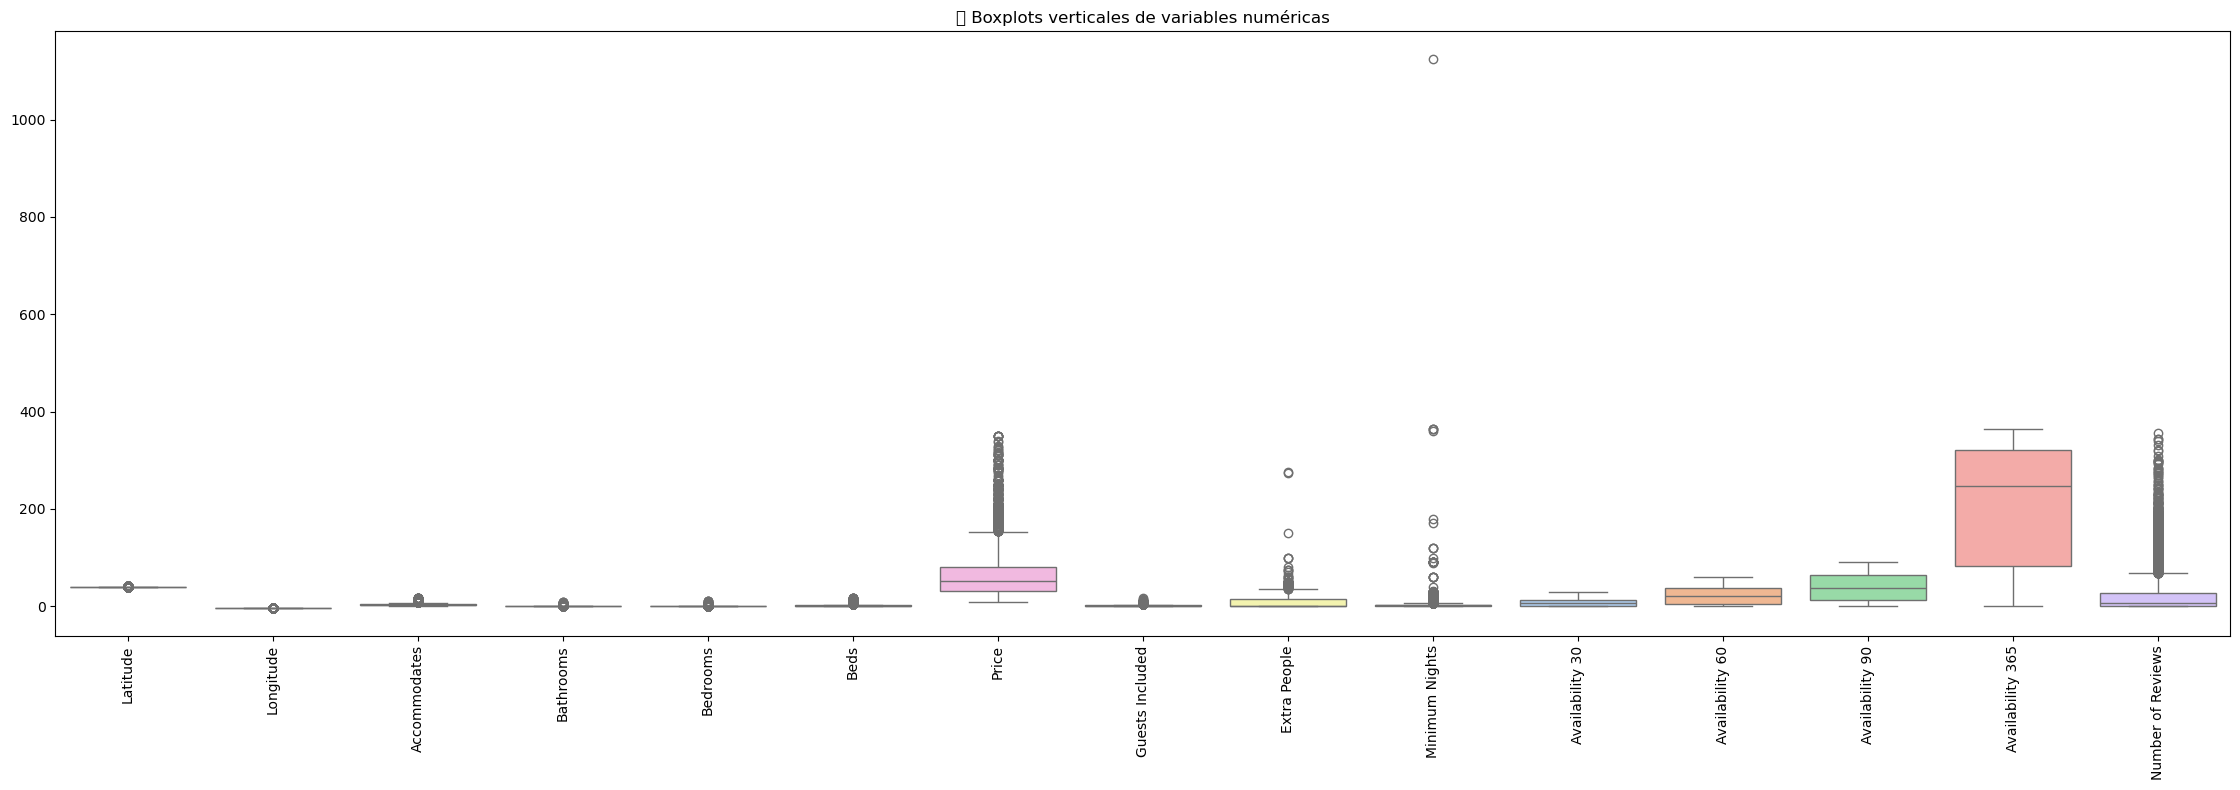

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns


cols_to_plot = [
    'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
    'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
    'Number of Reviews'
]


plt.figure(figsize=(len(cols_to_plot) * 1.5, 8))

sns.boxplot(data=bronze_data[cols_to_plot], orient='v', palette='pastel')
plt.xticks(rotation=90)
plt.title("📦 Boxplots verticales de variables numéricas")
plt.tight_layout()
plt.show()


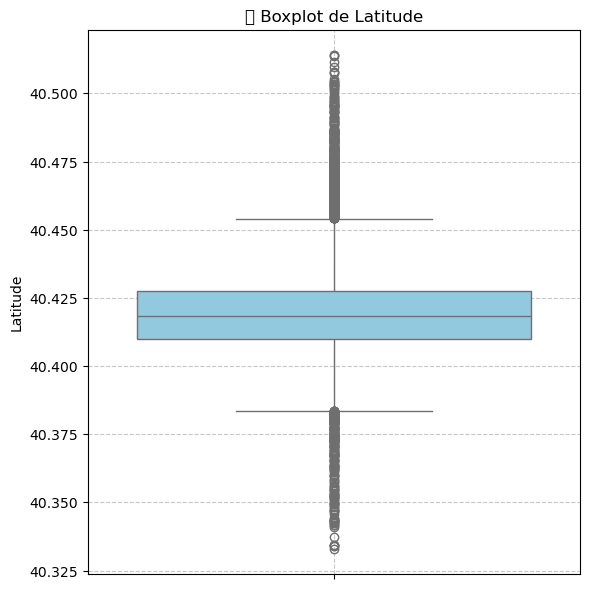

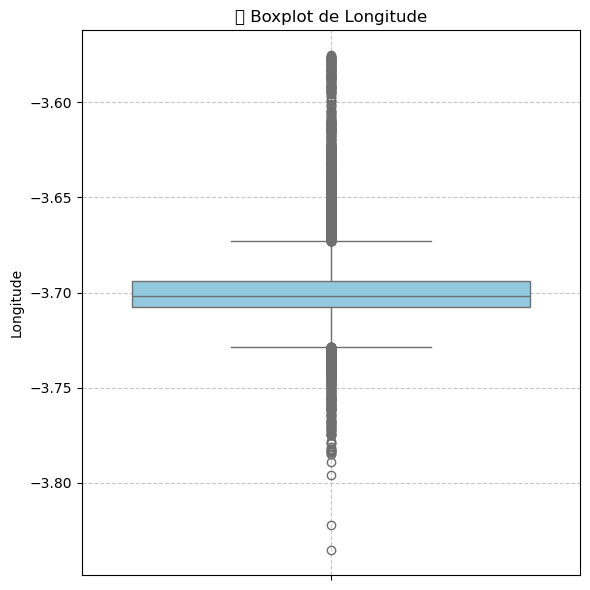

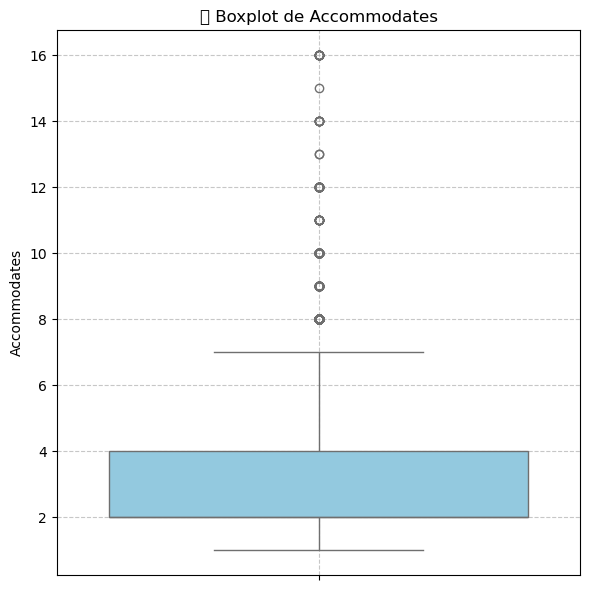

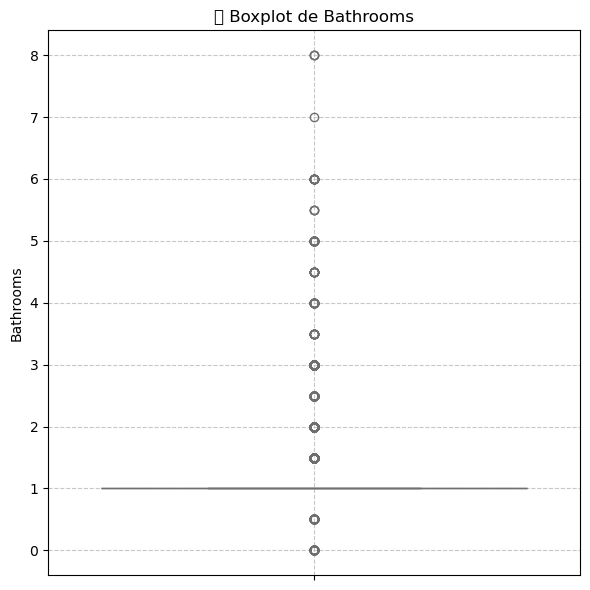

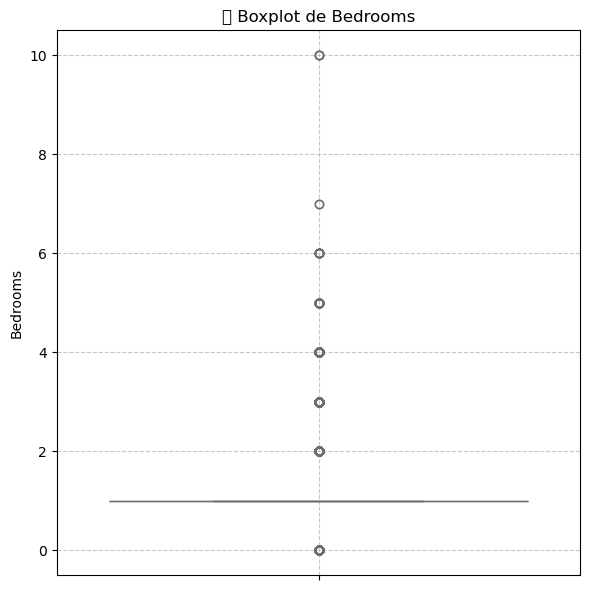

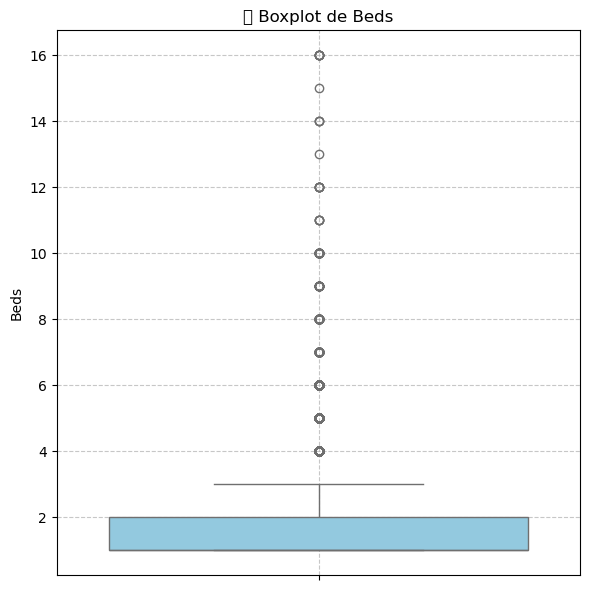

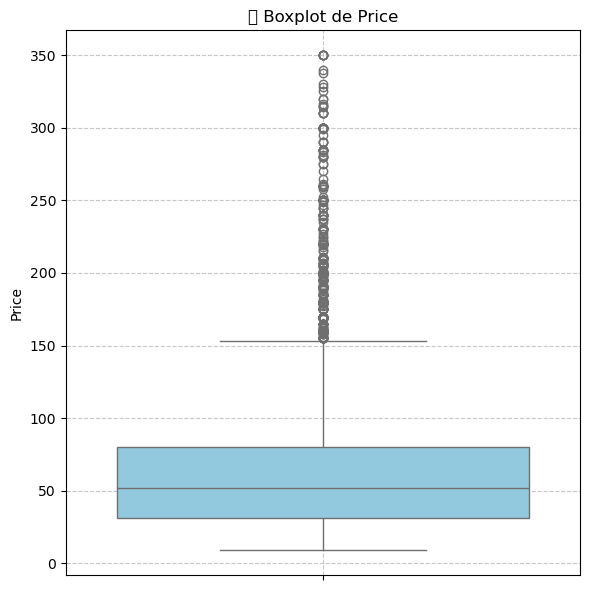

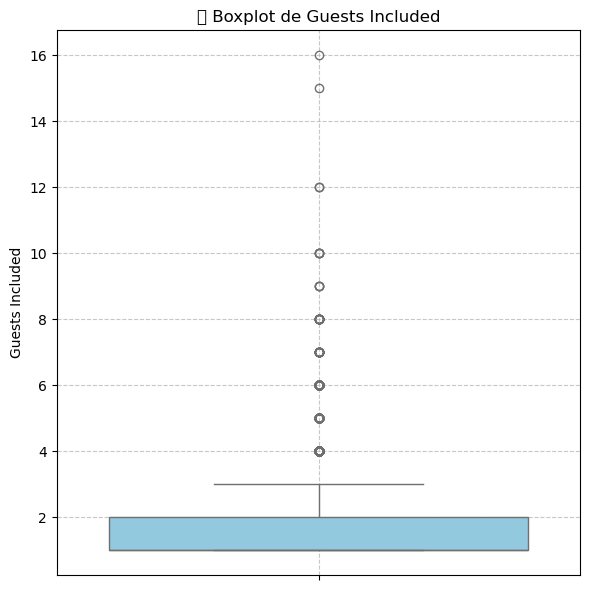

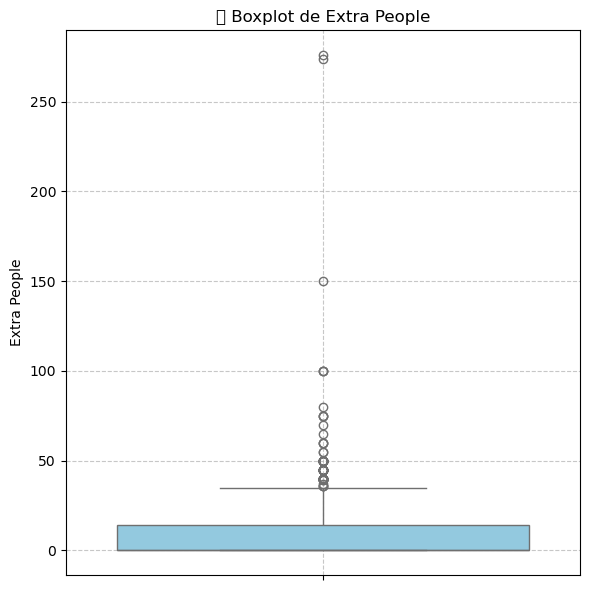

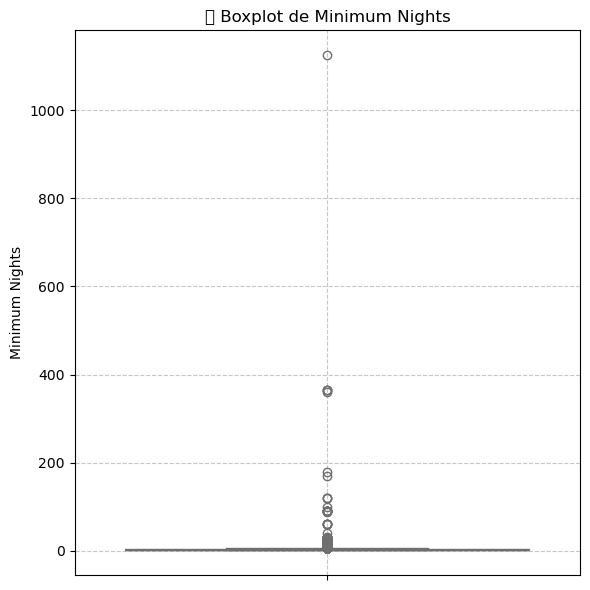

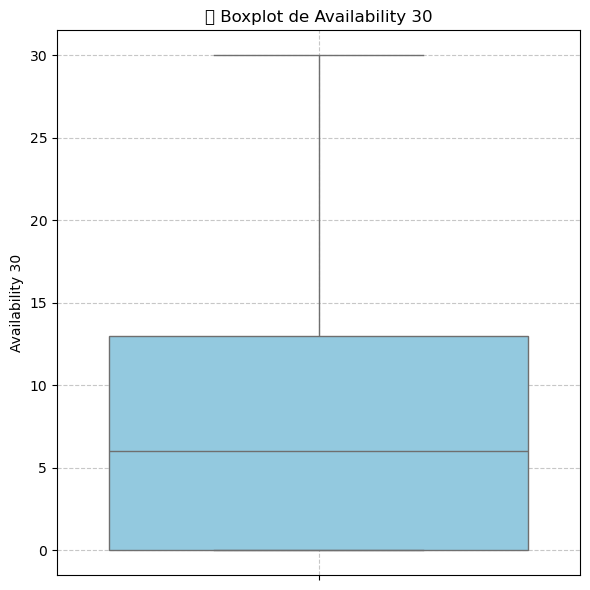

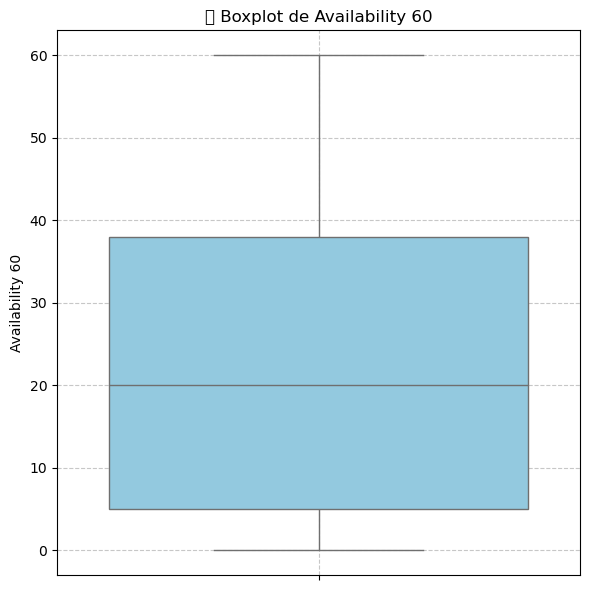

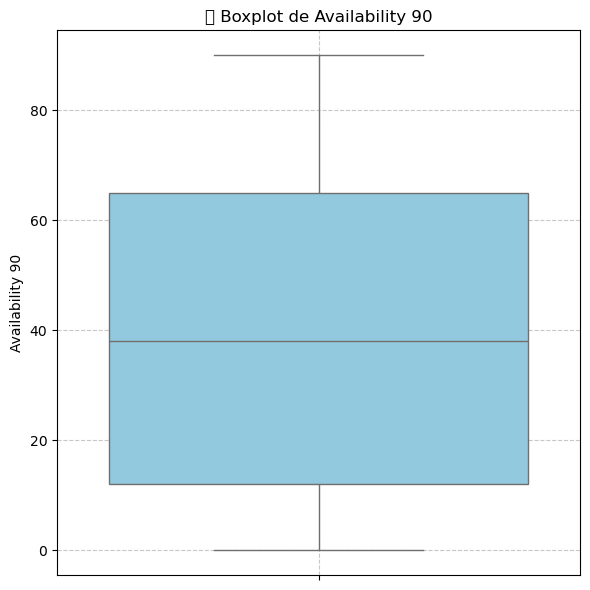

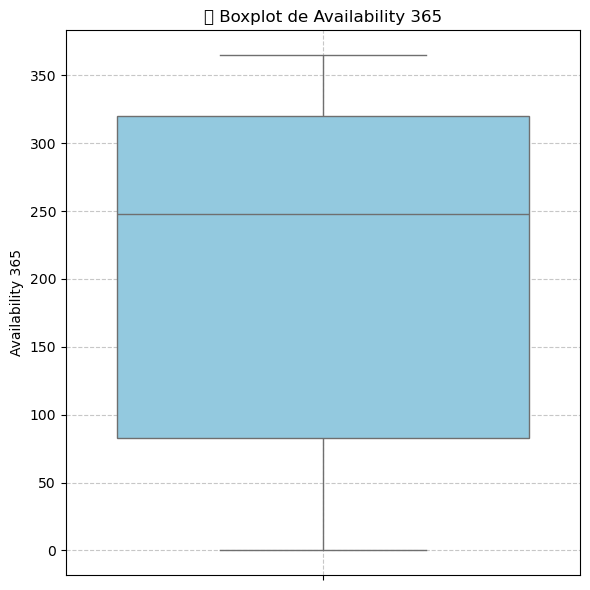

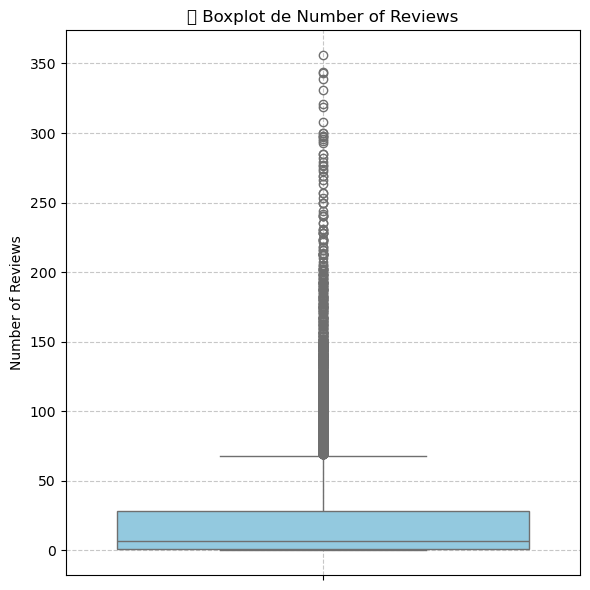

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas (exceptuando ID)
cols_to_plot = [
    'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
    'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
    'Number of Reviews'
]

# Crear una figura por variable
for col in cols_to_plot:
    plt.figure(figsize=(6, 6))
    sns.boxplot(y=bronze_data[col], color='skyblue')
    plt.title(f'📦 Boxplot de {col}', fontsize=12)
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Analisis exploratorio de cada variable con la variable Price 

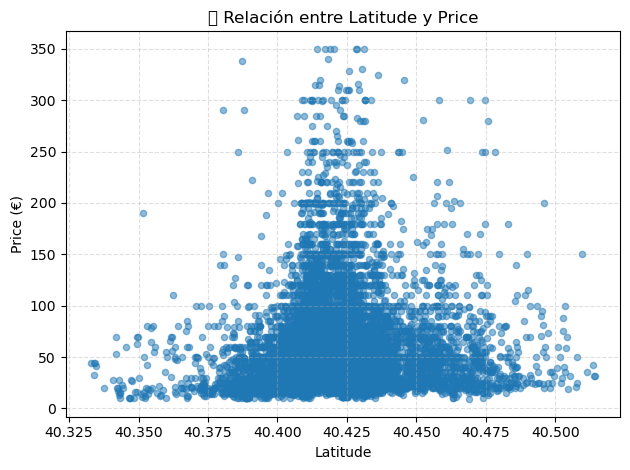

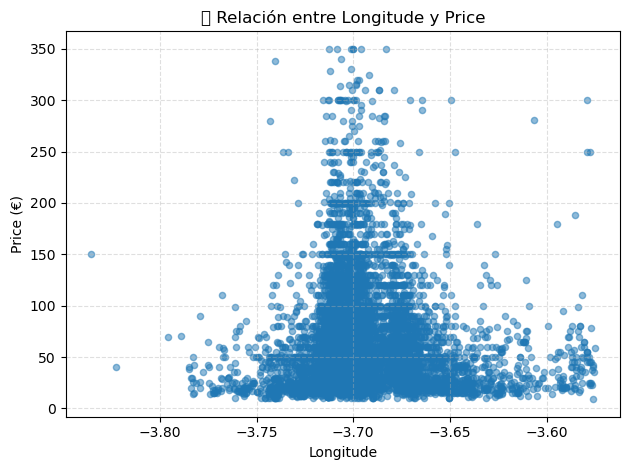

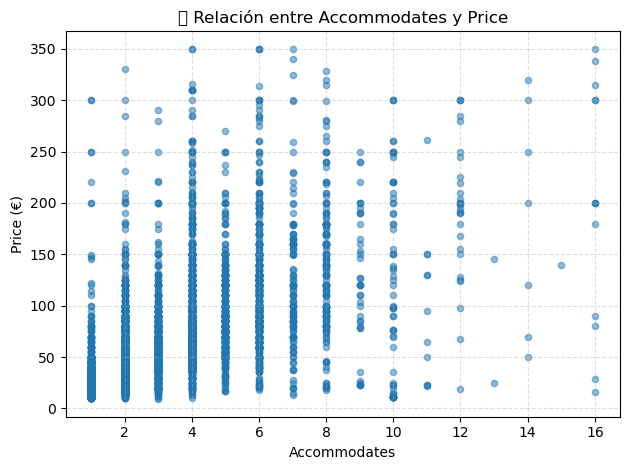

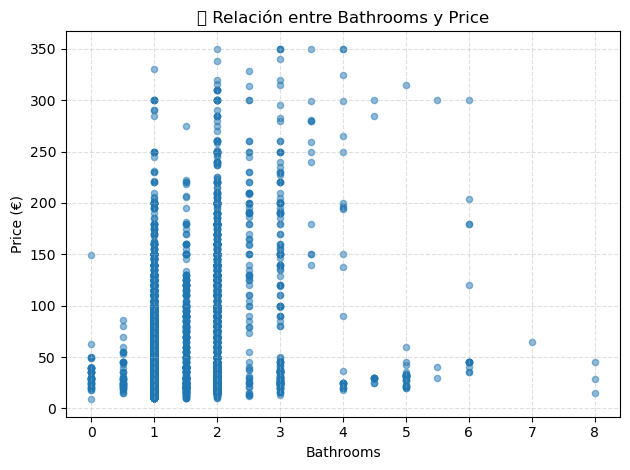

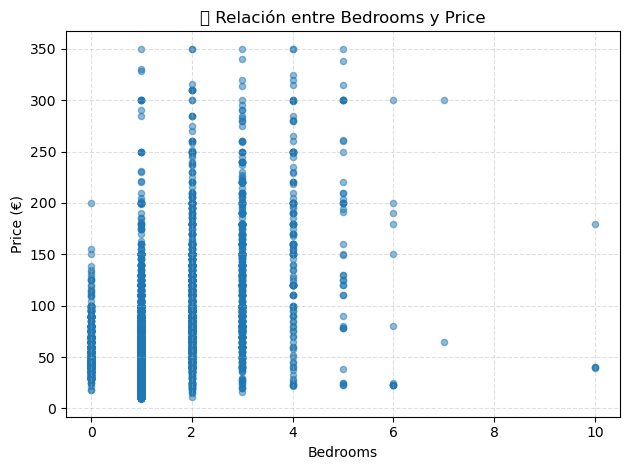

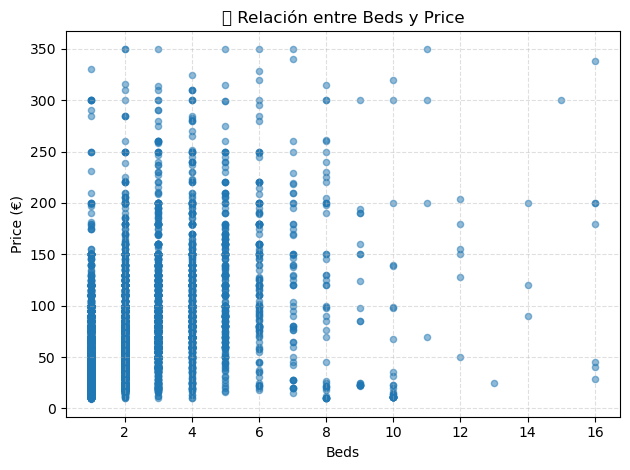

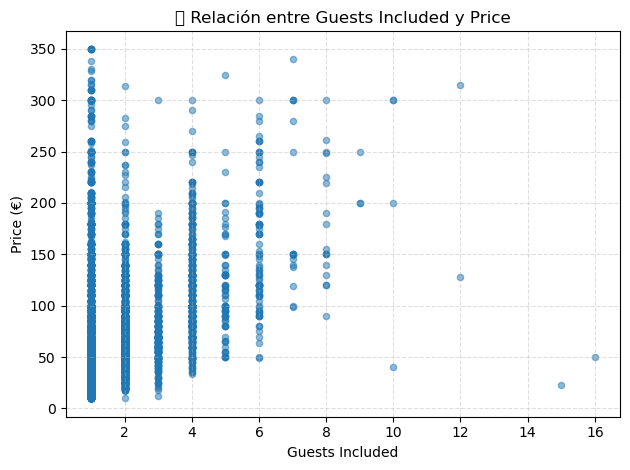

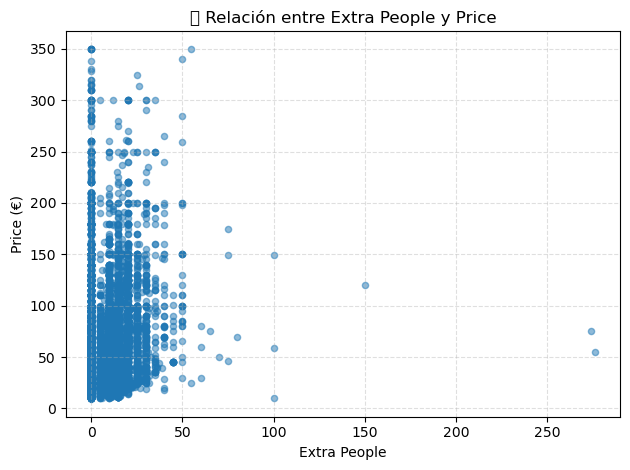

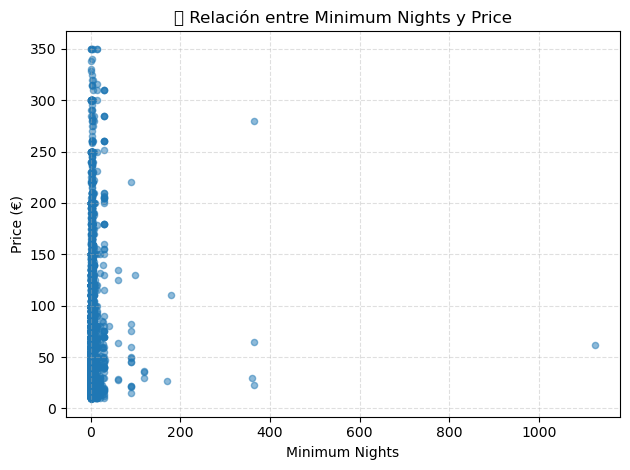

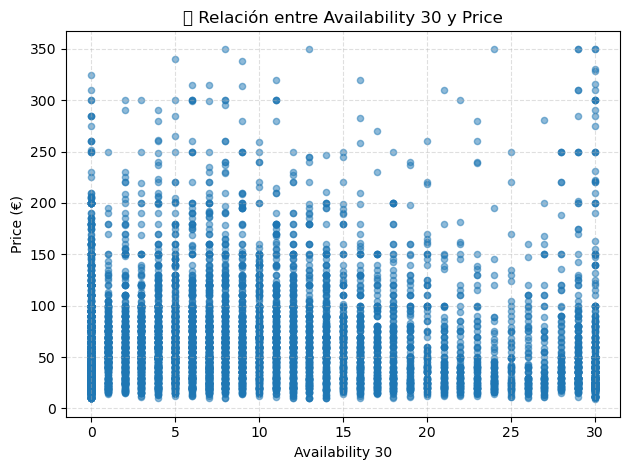

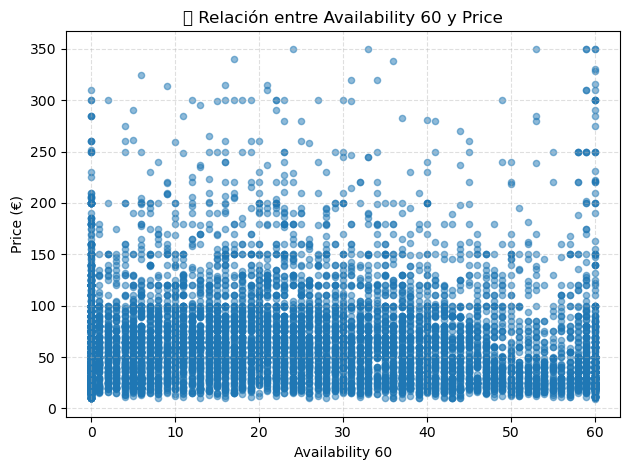

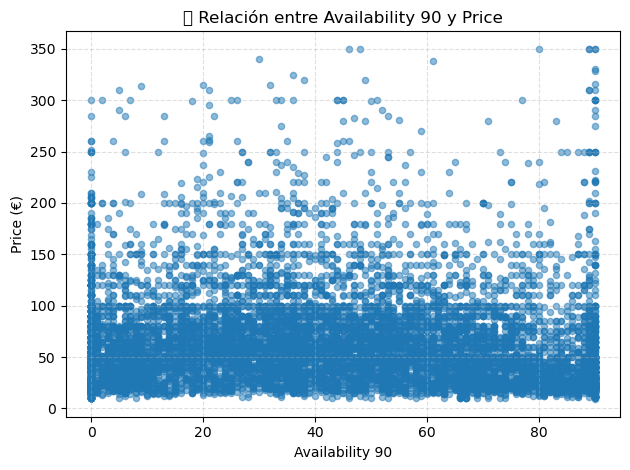

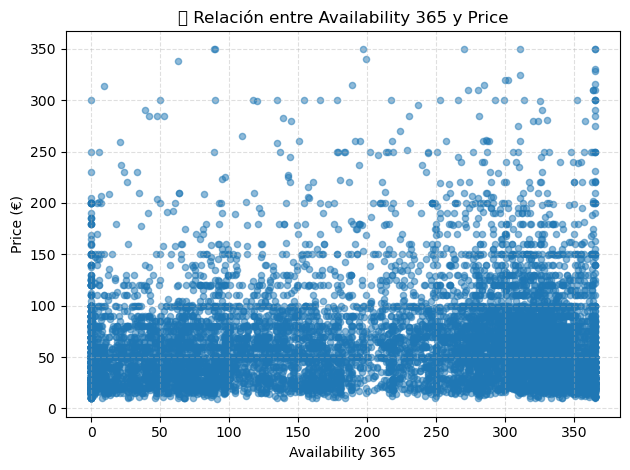

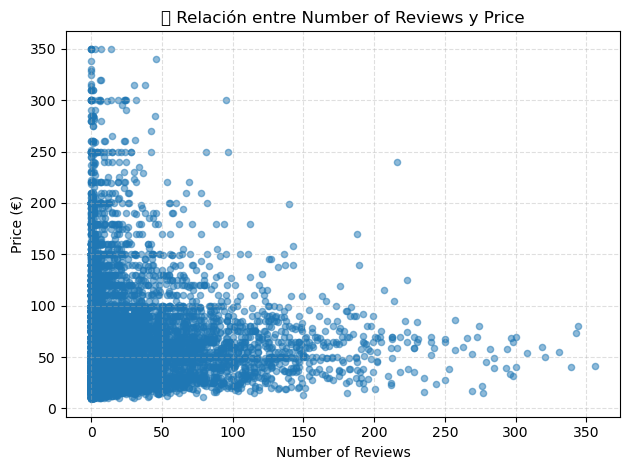

In [288]:
import matplotlib.pyplot as plt

# Lista de variables numéricas predictoras (excluimos 'ID' y 'Price')
vars_predictoras = [
    'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Guests Included', 'Extra People', 'Minimum Nights',
    'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365',
    'Number of Reviews'
]

# Gráficos scatter por cada variable frente a price
for col in vars_predictoras:
    bronze_data.plot(kind='scatter', x=col, y='Price', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Price (€)')
    plt.title(f'📈 Relación entre {col} y Price')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


ANALISIS DEL FTEST Y EL PVALOR 
Estudiamos la posible relacion lienal con precio.Podriamos considerar descartar todas las variables con un P>0.05 y quedarnos con aquellas que tengan un P< 0.05(relacion con Price) y un F-score mas elevado por que aportan mas valor predictivo 

In [103]:
from sklearn.feature_selection import f_regression
import pandas as pd


X = bronze_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Price'])
y = bronze_data['Price']


f_values, p_values = f_regression(X, y)


f_test_df = pd.DataFrame({
    'Variable': X.columns,
    'F-Score': f_values,
    'p-Value': p_values
}).sort_values(by='F-Score', ascending=False)


print(" Resultados del F-test (ordenados por relevancia):")
print(f_test_df)


 Resultados del F-test (ordenados por relevancia):
                                          Variable      F-Score        p-Value
3                                     Accommodates  6341.319313   0.000000e+00
32                        RoomType_Entire home/apt  4676.755994   0.000000e+00
33                           RoomType_Private room  4260.010163   0.000000e+00
7                                     Cleaning Fee  4250.772724   0.000000e+00
5                                         Bedrooms  3785.634702   0.000000e+00
6                                             Beds  3044.192446   0.000000e+00
8                                  Guests Included  2182.092036   0.000000e+00
36                            Ame_Air conditioning  1417.927805  3.560849e-291
40                         Ame_Family/kid friendly  1218.655980  1.057177e-252
4                                        Bathrooms   960.352797  7.721556e-202
54  Ame_translation missing: en.hosting_amenity_49   732.875189  4.490755e-156
5

HACEMOS UN ESTUDIO DE RELACION LINEAL Y DE MUTUAL PARA HACER UNA SELECCION MEDIANTE UN INSIGHT EN SU GRAFICA QUE NOS PUEDA ORIENTAR MEJOR 

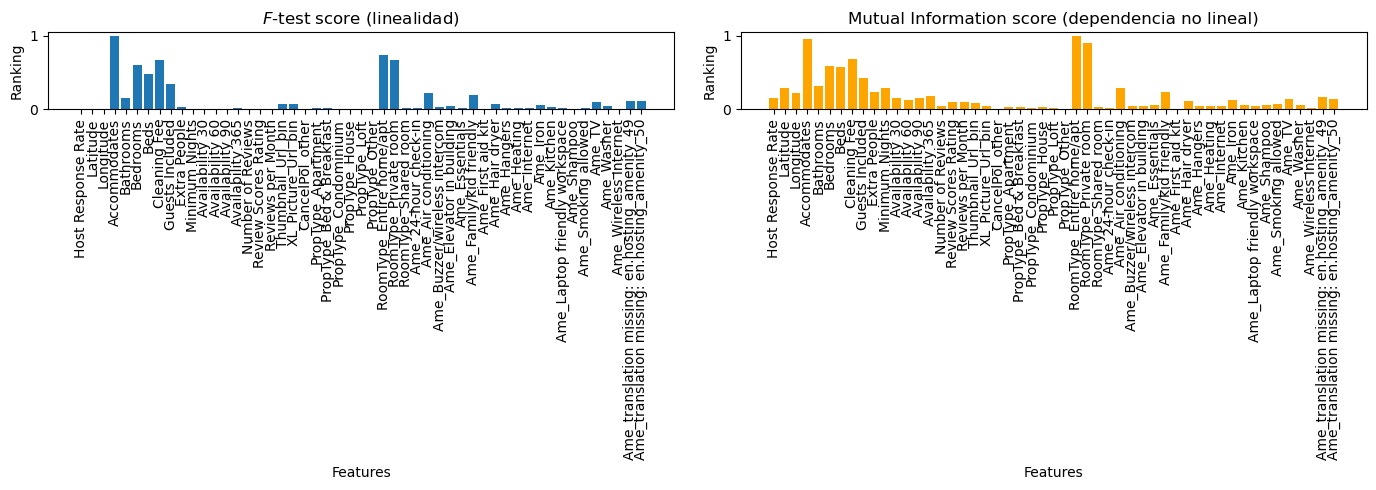

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression


X = bronze_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Price'])
y = bronze_data['Price']
feature_names = X.columns.tolist()


f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)  

mi = mutual_info_regression(X, y, random_state=0)
mi /= np.max(mi)  


plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), f_test, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('$F$-test score (linealidad)')


plt.subplot(1, 2, 2)
plt.bar(range(X.shape[1]), mi, align="center", color='orange')
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Mutual Information score (dependencia no lineal)')

plt.tight_layout()
plt.show()


Hacemos nuevos descartes de Variables 

In [290]:

cols_to_drop = ['Number of Reviews', 'Extra People','Experiences Offered']
bronze_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')


print(" Columnas eliminadas:", cols_to_drop)
print("Columnas actuales en bronze_data:")
print(bronze_data.columns.tolist())


 Columnas eliminadas: ['Number of Reviews', 'Extra People', 'Experiences Offered']
Columnas actuales en bronze_data:
['Host Response Rate', 'City', 'Country', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Cleaning Fee', 'Guests Included', 'Minimum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Review Scores Rating', 'Reviews per Month', 'Thumbnail_Url_bin', 'XL_Picture_Url_bin', 'CancelPol_other', 'PropType_Apartment', 'PropType_Bed & Breakfast', 'PropType_Condominium', 'PropType_House', 'PropType_Loft', 'PropType_Other', 'RoomType_Entire home/apt', 'RoomType_Private room', 'RoomType_Shared room', 'Ame_24-hour check-in', 'Ame_Air conditioning', 'Ame_Buzzer/wireless intercom', 'Ame_Elevator in building', 'Ame_Essentials', 'Ame_Family/kid friendly', 'Ame_First aid kit', 'Ame_Hair dryer', 'Ame_Hangers', 'Ame_Heating', 'Ame_Internet', 'Ame_Iron', 'Ame_Kitchen', 'Ame_Laptop friendly workspace', 'Ame_Shampoo', 'Ame

Analisis de correlacion 
Dado que hemos aplicado Dummies en buena parte de la division de las variables Categoricas, existe un importante riesto de correlacion que hay que intentar reducir detectando los principales casos y eliminandolos

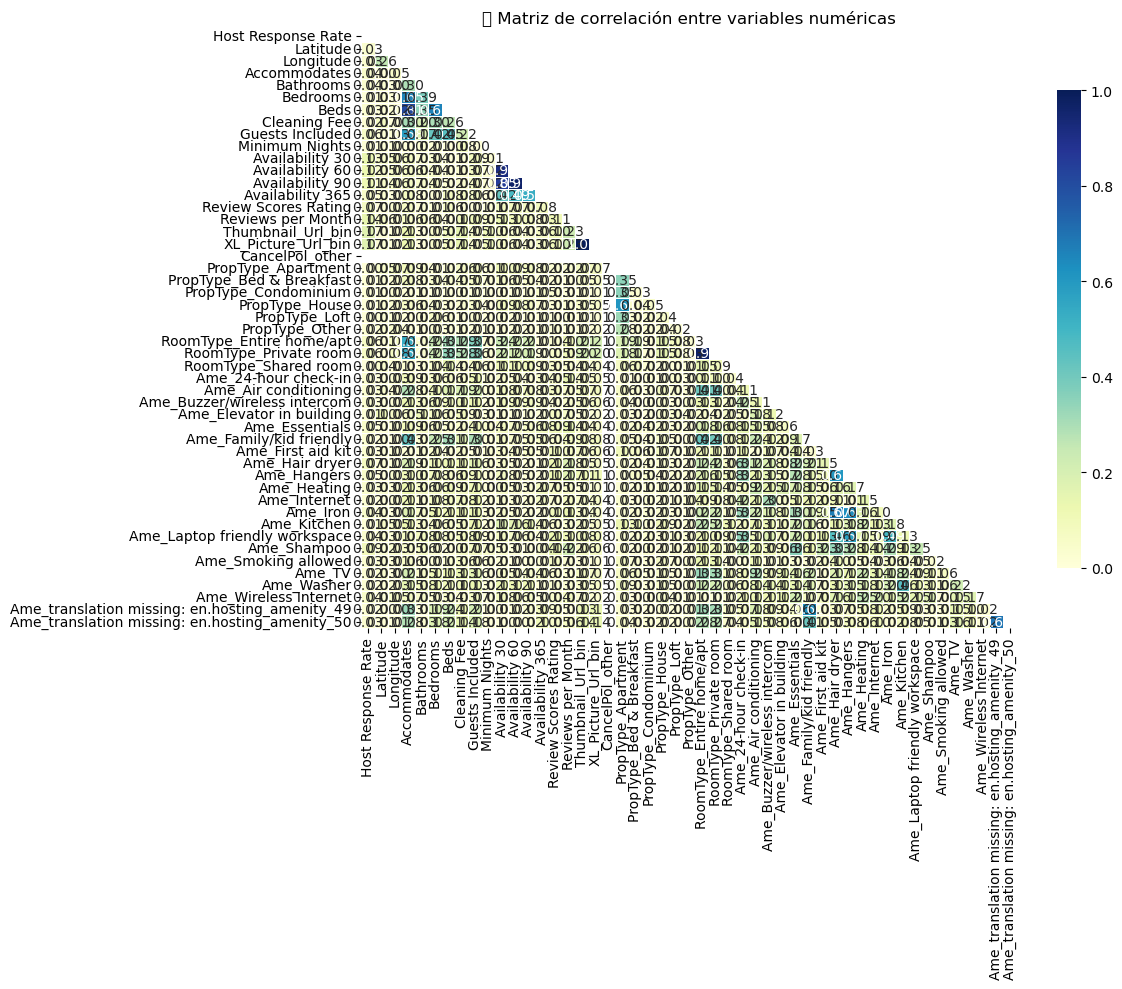

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


numeric_cols = bronze_data.select_dtypes(include=['int64', 'float64']).columns.tolist()


numeric_cols_no_price = [col for col in numeric_cols if col != 'Price']


corr = np.abs(bronze_data[numeric_cols_no_price].corr())


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(corr)] = True


plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    vmin=0.0,
    vmax=1.0,
    center=0.5,
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={"shrink": .8},
    annot=True,
    fmt=".2f"
)

plt.title(" Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


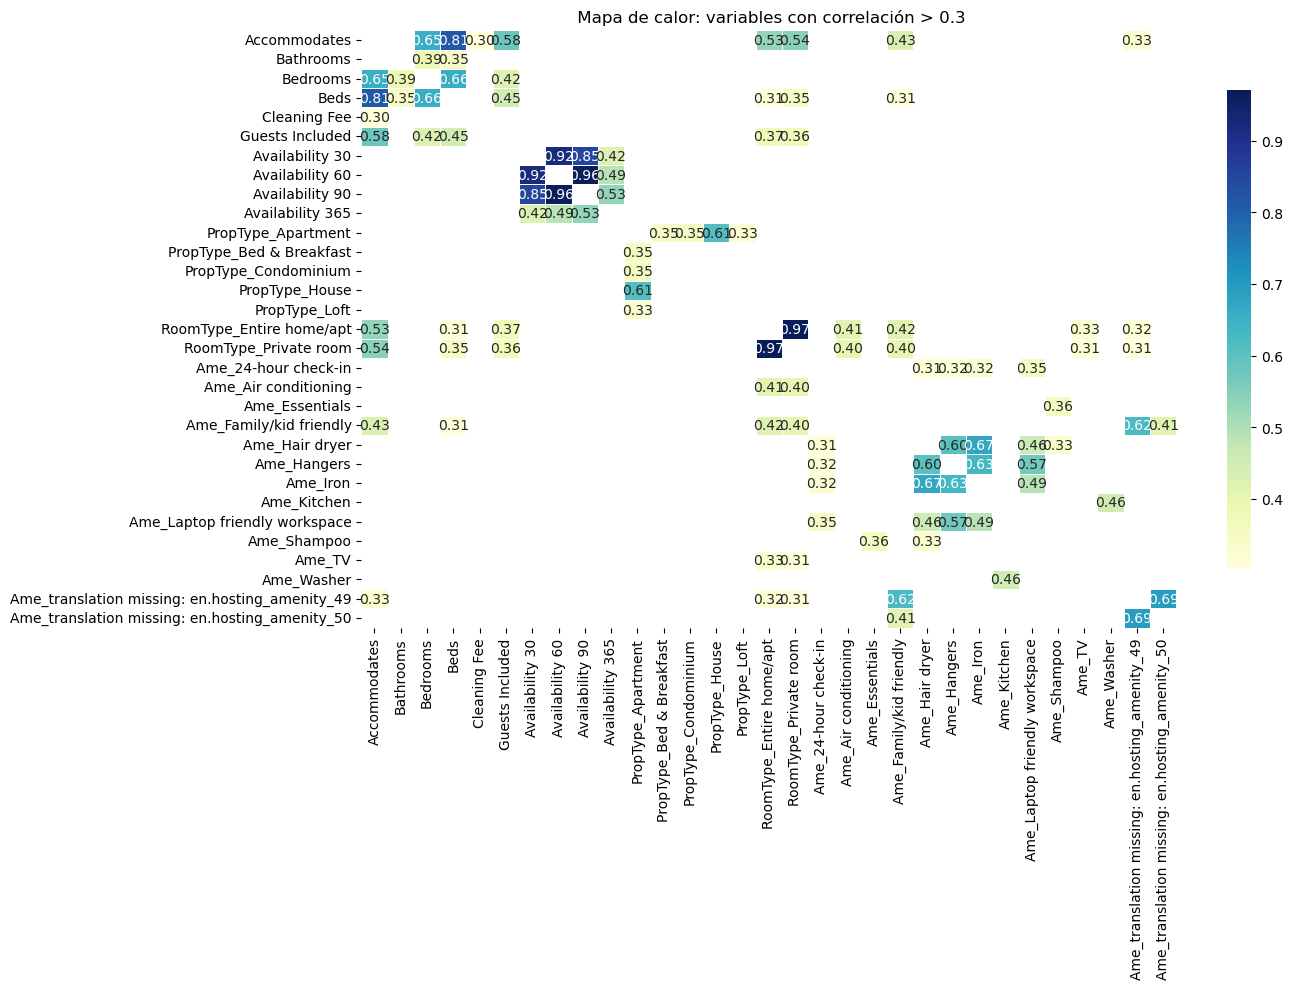

In [293]:

corr_matrix = np.abs(bronze_data[numeric_cols_no_price].corr())


corr_filter = corr_matrix[(corr_matrix > 0.3) & (corr_matrix < 1.0)].dropna(axis=1, how='all').dropna(axis=0, how='all')


plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_filter,
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={"shrink": .8},
    annot=True,
    fmt=".2f"
)
plt.title(" Mapa de calor: variables con correlación > 0.3")
plt.tight_layout()
plt.show()


Eliminamos variables que resultan tener valores superiores a 60 en la matriz de correlacion 

In [295]:

cols_to_drop = ['Beds', 'Availability 60', 'Availability 90','Ame_Wireless Internet','Ame_Hair dryer','Ame_Hangers','translation missing: en.hosting_amenity_49','City','Country']


bronze_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')


print("Columnas eliminadas:", cols_to_drop)
print("Columnas actuales en bronze_data:")
print(bronze_data.columns.tolist())


Columnas eliminadas: ['Beds', 'Availability 60', 'Availability 90', 'Ame_Wireless Internet', 'Ame_Hair dryer', 'Ame_Hangers', 'translation missing: en.hosting_amenity_49', 'City', 'Country']
Columnas actuales en bronze_data:
['Host Response Rate', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Price', 'Cleaning Fee', 'Guests Included', 'Minimum Nights', 'Availability 30', 'Availability 365', 'Review Scores Rating', 'Reviews per Month', 'Thumbnail_Url_bin', 'XL_Picture_Url_bin', 'CancelPol_other', 'PropType_Apartment', 'PropType_Bed & Breakfast', 'PropType_Condominium', 'PropType_House', 'PropType_Loft', 'PropType_Other', 'RoomType_Entire home/apt', 'RoomType_Private room', 'RoomType_Shared room', 'Ame_24-hour check-in', 'Ame_Air conditioning', 'Ame_Buzzer/wireless intercom', 'Ame_Elevator in building', 'Ame_Essentials', 'Ame_Family/kid friendly', 'Ame_First aid kit', 'Ame_Heating', 'Ame_Internet', 'Ame_Iron', 'Ame_Kitchen', 'Ame_Laptop friendly workspace', 'Ame_Sham

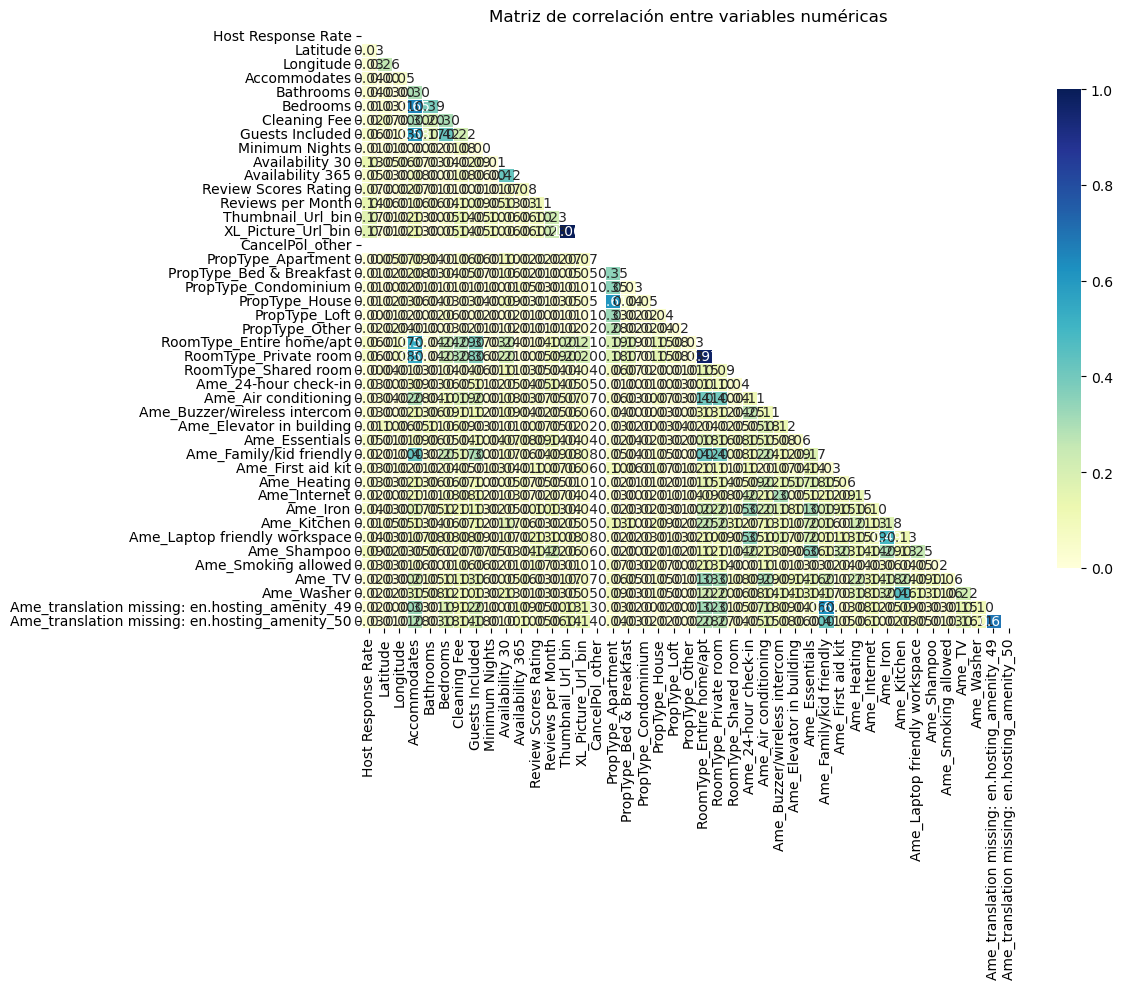

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


numeric_cols = bronze_data.select_dtypes(include=['int64', 'float64']).columns.tolist()


numeric_cols_no_price = [col for col in numeric_cols if col != 'Price']


corr = np.abs(bronze_data[numeric_cols_no_price].corr())


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(corr)] = True


plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    vmin=0.0,
    vmax=1.0,
    center=0.5,
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={"shrink": .8},
    annot=True,
    fmt=".2f"
)

plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

Realizamos un analisis de Importancia de las variables mediante el uso de Random Forest para apoyar las decisiones que hemos ido tomando sobre la reduccion del dataset en cuanto a variables

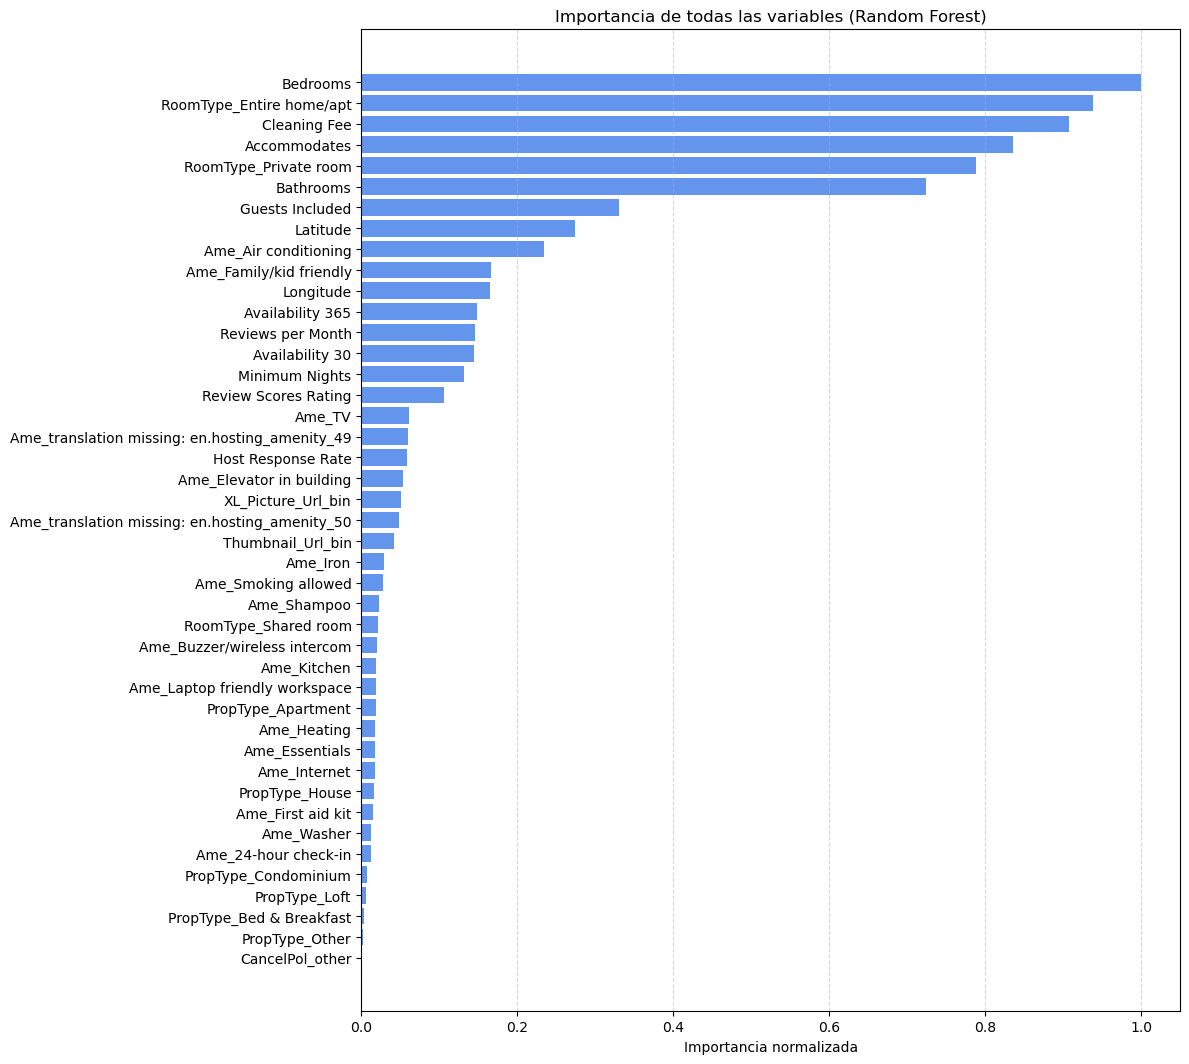

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


features = [col for col in bronze_data.select_dtypes(include=['int64', 'float64']).columns if col != 'Price']


X_train = bronze_data[features]
y_train = bronze_data['Price']


randomForest = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    random_state=0
)
randomForest.fit(X_train, y_train)


importances = randomForest.feature_importances_
importances = importances / np.max(importances)
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(12, max(6, len(features) * 0.25)))  
plt.barh(range(len(features)), importances[indices], color='cornflowerblue')
plt.yticks(range(len(features)), np.array(features)[indices])
plt.xlabel('Importancia normalizada')
plt.title('Importancia de todas las variables (Random Forest)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




Hago una primera exploracion de los resultado del Modelo empleando Random Forest

In [299]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


features = [col for col in bronze_data.select_dtypes(include=['int64','float64']).columns if col!='Price']
X = bronze_data[features].values
y = bronze_data['Price'].values

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    random_state=0
)
rf.fit(X, y)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top4_idx = indices[:4]
top4_feats = [features[i] for i in top4_idx]
print("Top 4 variables:", top4_feats)


X4 = bronze_data[top4_feats].values


mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true,y_pred, squared=False),
                          greater_is_better=False)


mae_scores = -cross_val_score(rf, X4, y, cv=5, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(rf, X4, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = -cross_val_score(rf, X4, y, cv=5, scoring='neg_root_mean_squared_error')

print(f"MAE (5-fold):  {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")
print(f"MSE (5-fold):  {mse_scores.mean():.3f} ± {mse_scores.std():.3f}")
print(f"RMSE (5-fold): {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}")

Top 4 variables: ['Bedrooms', 'RoomType_Entire home/apt', 'Cleaning Fee', 'Accommodates']
MAE (5-fold):  18.067 ± 0.285
MSE (5-fold):  821.232 ± 38.115
RMSE (5-fold): 28.649 ± 0.670


Aplico CV para evaluar el RMSE en funcion del empleo de mas o variables

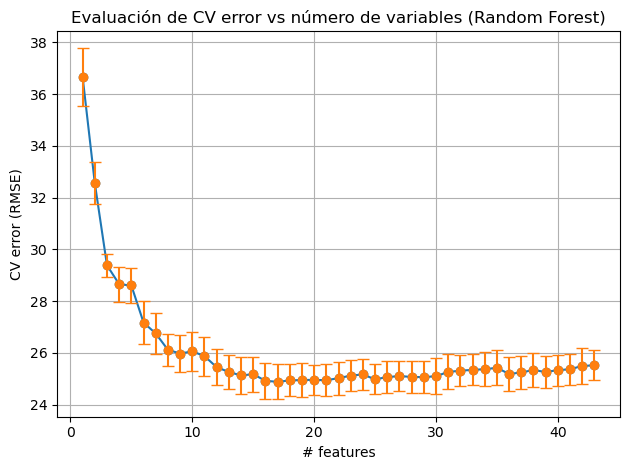

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


features = bronze_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Price']).columns.tolist()
X = bronze_data[features].values
y = bronze_data['Price'].values


model = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', random_state=0)
model.fit(X, y)
importances = model.feature_importances_
top_indices = np.argsort(importances)[::-1]  
Nfeatures = len(features)


cv_error = []
cv_std = []

for n in range(1, Nfeatures + 1):
    X_subset = X[:, top_indices[:n]]
    scores = cross_val_score(model, X_subset, y, cv=5, scoring='neg_root_mean_squared_error')
    cv_error.append(-scores.mean())
    cv_std.append(scores.std())


plt.plot(range(1, Nfeatures + 1), cv_error, '-o')
plt.errorbar(range(1, Nfeatures + 1), cv_error, yerr=cv_std, fmt='o', capsize=4)
plt.xlabel('# features')
plt.ylabel('CV error (RMSE)')
plt.title('Evaluación de CV error vs número de variables (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


La grafica nos permite visualizar que entorno a 18 puede ser el valor optimo de features

El modelo con ajusta mejor que la media por lo que a priori no son malos resultados , nos quedariamos con 6-7 variables 

Hacemos un segundo analisis de las features optimas empleando R2

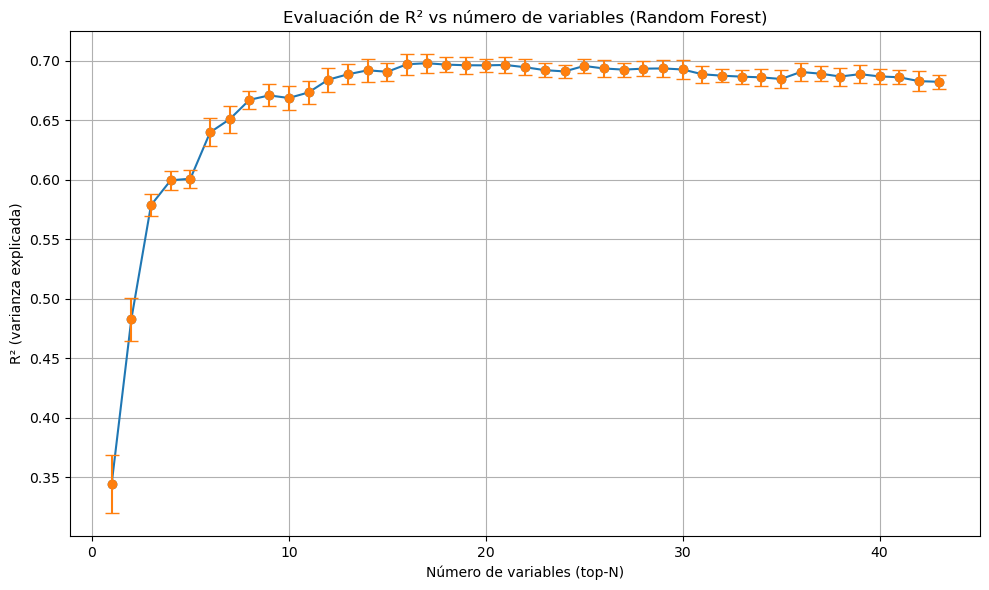

In [301]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


features = bronze_data.select_dtypes(include=['int64', 'float64']).drop(columns=['Price']).columns.tolist()
X = bronze_data[features].values
y = bronze_data['Price'].values


rf = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', random_state=0)
rf.fit(X, y)
importances = rf.feature_importances_
top_indices = np.argsort(importances)[::-1]
Nfeatures = len(features)


r2_scores = []
r2_std = []

for n in range(1, Nfeatures + 1):
    X_subset = X[:, top_indices[:n]]
    scores = cross_val_score(rf, X_subset, y, cv=5, scoring='r2')
    r2_scores.append(scores.mean())
    r2_std.append(scores.std())


plt.figure(figsize=(10, 6))
plt.plot(range(1, Nfeatures + 1), r2_scores, '-o', label='R² medio')
plt.errorbar(range(1, Nfeatures + 1), r2_scores, yerr=r2_std, fmt='o', capsize=5)
plt.xlabel('Número de variables (top-N)')
plt.ylabel('R² (varianza explicada)')
plt.title('Evaluación de R² vs número de variables (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


Los resultados coinciden con el estudio del RSME , en torno a 17-18 variables es lo optimo 

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


features = [col for col in bronze_data.select_dtypes(include=['int64','float64']).columns if col!='Price']
X_all = bronze_data[features].values
y     = bronze_data['Price'].values

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    random_state=0
)
rf.fit(X_all, y)

importances = rf.feature_importances_
indices     = np.argsort(importances)[::-1]   


for n in [4, 6, 8, 10]:
    top_feats = [features[i] for i in indices[:n]]
    Xn = bronze_data[top_feats].values

    r2   = cross_val_score(rf, Xn, y, cv=5, scoring='r2').mean()
    rmse = -cross_val_score(rf, Xn, y, cv=5, scoring='neg_root_mean_squared_error').mean()
    mae  = -cross_val_score(rf, Xn, y, cv=5, scoring='neg_mean_absolute_error').mean()

    print(f"Top-{n:2d} → R²: {r2:.3f}   RMSE: {rmse:.3f}   MAE: {mae:.3f}")

Top- 4 → R²: 0.600   RMSE: 28.652   MAE: 18.042
Top- 6 → R²: 0.641   RMSE: 27.130   MAE: 17.202
Top- 8 → R²: 0.658   RMSE: 26.483   MAE: 16.715
Top-10 → R²: 0.683   RMSE: 25.511   MAE: 15.983


ESCALAMOS EL SUBCONJUNTO TRAIN ANTES DE TRANSFORMAR TEST 

In [302]:
from sklearn.preprocessing import StandardScaler


X_train = bronze_data.drop(columns='Price')
y_train = bronze_data['Price']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


print(" X_train escalado con shape:", X_train_scaled.shape)


 X_train escalado con shape: (10497, 43)


Cargamos el subconjunto de test 

In [303]:
test_data = pd.read_csv('./airbnb-test.csv', sep=';', quotechar='"', engine='python', decimal='.')


Hacemos las tranformaciones en test .Lo correcto hubiese sido crear un pipeline con todas las transformaciones

In [304]:


import pandas as pd
import numpy as np


test_data = pd.read_csv('./airbnb-test.csv', sep=';', quotechar='"', engine='python', decimal='.')

# Paso 1: 
test_data = test_data[test_data['Price'] <= 350].copy()

# Paso 2: 
if 'Host Response Rate' in test_data.columns:
    test_data['Host Response Rate'] = test_data['Host Response Rate'].replace(['None', 'nan', 'NaN'], np.nan)
    test_data['Host Response Rate'] = test_data['Host Response Rate'].astype(str).str.replace('%', '', regex=False)
    test_data['Host Response Rate'] = pd.to_numeric(test_data['Host Response Rate'], errors='coerce')
    test_data['Host Response Rate'] = test_data['Host Response Rate'].round().astype('Int64')

# Paso 3: 
cols_url = ['Thumbnail Url', 'XL Picture Url']
for col in cols_url:
    binary_col = col.replace(' ', '_') + '_bin'
    test_data[binary_col] = test_data[col].notnull().astype(int)

# Paso 4: 
if 'Reviews per Month' in test_data.columns:
    test_data['Reviews per Month'] = test_data['Reviews per Month'].replace(['None', 'nan', 'NaN'], np.nan)
    test_data['Reviews per Month'] = pd.to_numeric(test_data['Reviews per Month'], errors='coerce')

# Paso 5: 
if 'Review Scores Rating' in test_data.columns:
    test_data['Review Scores Rating'] = test_data['Review Scores Rating'].replace(['None', 'NaN', 'nan'], np.nan)
    test_data['Review Scores Rating'] = pd.to_numeric(test_data['Review Scores Rating'], errors='coerce')
    test_data['Review Scores Rating'] = test_data['Review Scores Rating'].round().astype('Int64')

# Paso 6
mapping = {
    'CancelPol_flexible': 'flexible',
    'CancelPol_flexible_new': 'flexible',
    'CancelPol_moderate': 'moderate',
    'CancelPol_moderate_new': 'moderate',
    'CancelPol_strict': 'strict',
    'CancelPol_strict_new': 'strict',
    'CancelPol_super_strict_30': 'super_strict',
    'CancelPol_super_strict_60': 'super_strict',
}
test_data['CancelPol_grouped'] = test_data['Cancellation Policy'].map(mapping).fillna('other')
dummies = pd.get_dummies(test_data['CancelPol_grouped'], prefix='CancelPol', dtype=int)
test_data = pd.concat([test_data, dummies], axis=1)
test_data.drop(columns=['Cancellation Policy', 'CancelPol_grouped'], inplace=True)

# Paso 7: 


# Paso 8
dummies_property = pd.get_dummies(test_data['Property Type'], prefix='PropType', dtype=int)
test_data = pd.concat([test_data, dummies_property], axis=1)
test_data.drop(columns='Property Type', inplace=True)

# Paso 9
property_cols = [col for col in test_data.columns if col.startswith('PropType_')]
frecuencia_abs = test_data[property_cols].sum()
porcentaje_prop = (frecuencia_abs / len(test_data)) * 100
cols_to_drop = porcentaje_prop[porcentaje_prop < 1.36].index.tolist()
test_data.drop(columns=cols_to_drop, inplace=True)

# Paso 10
dummies_room = pd.get_dummies(test_data['Room Type'], prefix='RoomType', dtype=int)
test_data = pd.concat([test_data, dummies_room], axis=1)
test_data.drop(columns='Room Type', inplace=True)

# Paso 11
categorical_columns_to_drop = [
    'Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
    'Medium Url', 'Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
    'Host About', 'Host Response Time', 'Thumbnail Url', 'XL Picture Url',
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications',
    'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
    'Maximum Nights', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
    'Room Type', 'Bed Type', 'Calendar Updated', 'Has Availability',
    'Calendar last Scraped', 'First Review', 'Last Review', 'License',
    'Jurisdiction Names', 'Geolocation', 'Features'
]
test_data.drop(columns=categorical_columns_to_drop, inplace=True, errors='ignore')

# Paso 12
if 'Amenities' in test_data.columns:
    test_data['Amenities'] = test_data['Amenities'].fillna('Unknown').astype(str)
    test_data['Amenities'] = test_data['Amenities'].str.replace(r'[\[\]"]', '', regex=True)
    amenities_dummies = test_data['Amenities'].str.get_dummies(sep=',')
    amenities_dummies.columns = ['Ame_' + col.strip() for col in amenities_dummies.columns]
    test_data = pd.concat([test_data, amenities_dummies], axis=1)
    test_data.drop(columns='Amenities', inplace=True)

# Paso 13
amenities_cols = [col for col in test_data.columns if col.startswith('Ame_')]
frecuencia_abs = test_data[amenities_cols].sum()
porcentaje_amenities = (frecuencia_abs / len(test_data)) * 100
cols_to_drop = porcentaje_amenities[porcentaje_amenities < 22.74].index.tolist()
test_data.drop(columns=cols_to_drop, inplace=True)

# Paso 14
numeric_columns_to_drop = [
    'Scrape ID', 'Host ID', 'ID', 'Host Listings Count', 'Host Total Listings Count',
    'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit',
    'Review Scores Accuracy', 'Review Scores Cleanliness', 'Host Acceptance Rate',
    'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
    'Review Scores Value', 'Calculated host listings count','City','Country'
]
test_data.drop(columns=numeric_columns_to_drop, inplace=True, errors='ignore')

# Paso 15
if 'City' in test_data.columns and 'Country' in test_data.columns:
    filtro_geo = (test_data['Country'] == 'Spain') & (test_data['City'] == 'Madrid')
    test_data = test_data[filtro_geo].copy()

# Paso 16: Imputación de valores nulos con la mediana
for col in ['Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Cleaning Fee',
            'Host Response Rate', 'Reviews per Month', 'Review Scores Rating']:
    if col in test_data.columns:
        median_value = test_data[col].median()
        test_data[col] = test_data[col].fillna(median_value)

# Paso 17
cols_to_drop = ['Number of Reviews', 'Extra People','Experiences Offered'] 
test_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Paso 18
cols_to_drop = ['Beds', 'Availability 60', 'Availability 90', 'Ame_Wireless Internet',
                'Ame_Hair dryer', 'Ame_Hangers', 'translation missing: en.hosting_amenity_49']
test_data.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Paso 19: 


from sklearn.preprocessing import StandardScaler


X_test = test_data.drop(columns='Price').copy()
y_test = test_data['Price'].copy()


X_test = X_test[X_train.columns]


X_test_scaled = scaler.transform(X_test)

print("✅ X_test escalado correctamente:", X_test_scaled.shape)






✅ X_test escalado correctamente: (2922, 43)


ahora excluimos la variable objetivo 

aplicamos KNN en el modelo , este no lleva Lasso Ni ridge (no hay regularizacion )

In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor()


param_grid_knn = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2')
grid_knn.fit(X_train_scaled, y_train)


print(" Mejor combinación:", grid_knn.best_params_)
print(" R² en test:", grid_knn.score(X_test_scaled, y_test))


 Mejor combinación: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
 R² en test: 0.5683050936092275


Este metodo K-NN no resulta optimo bajo una eleccion de tantas variables, existe una excesiva dimensionalidad que favorece que haya vecinos afines/cercanos .Tras un primer proceso de seleccion de variables en el que opte por reducir mucho la dimensionalidad, el modelo K-NN no ofrecia tampoco resultados diferentes a los de este segundo intento con muchas mas variables obtenidas de las categoricas. Podria como soluciona seleccionar las variables mas relevantes como las 16-18 que me salian en el estudio de relevancia con Randon Forest

In [306]:
from sklearn.metrics import mean_squared_error
import numpy as np


y_pred_knn = grid_knn.predict(X_test_scaled)


mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)


print(f"MSE (KNN): {mse_knn:.2f}")
print(f" RMSE (KNN): {rmse_knn:.2f}")


MSE (KNN): 1124.98
 RMSE (KNN): 33.54


Constato los resultados mediocres/pobres del empleo del modelo K-NN

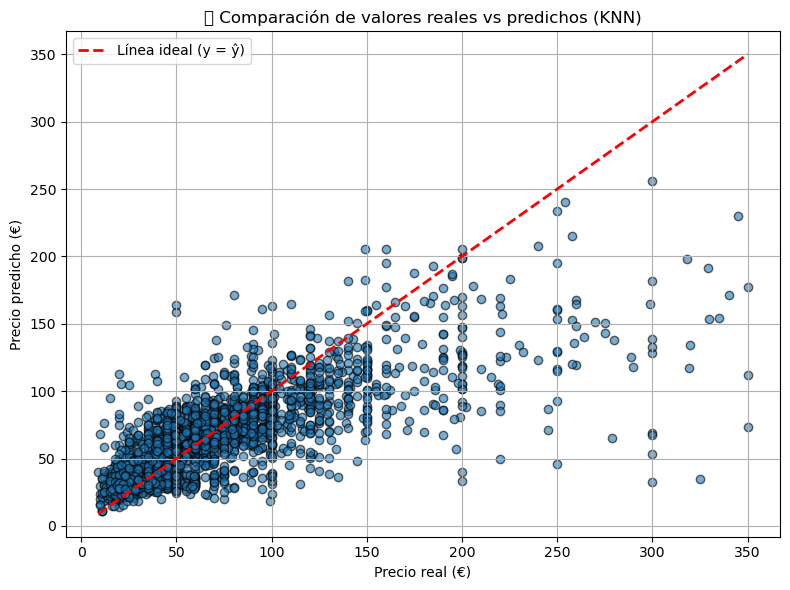

In [307]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Línea ideal (y = ŷ)')

plt.xlabel('Precio real (€)')
plt.ylabel('Precio predicho (€)')
plt.title('🔍 Comparación de valores reales vs predichos (KNN)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END ........................................max_depth=4; total time=   0.2s
[CV] END .......................................

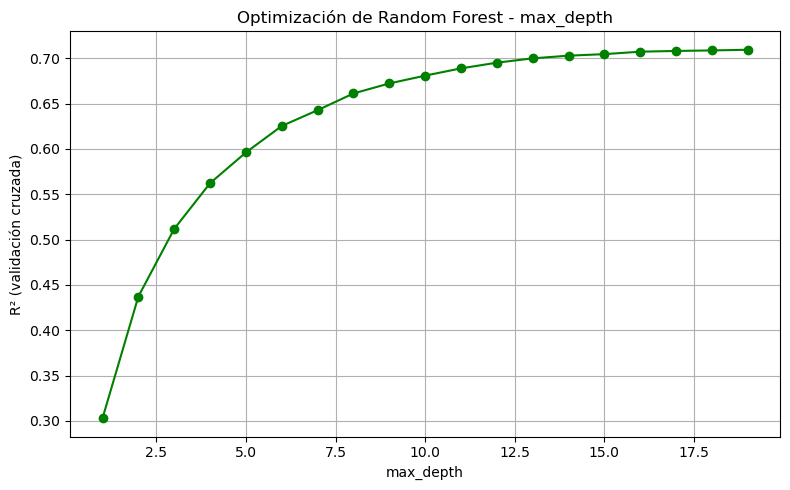

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np


maxDepth = range(1, 20)
tuned_parameters = {'max_depth': maxDepth}


grid = GridSearchCV(
    estimator=RandomForestRegressor(
        random_state=0,
        n_estimators=200,
        max_features='sqrt',
        n_jobs=-2
    ),
    param_grid=tuned_parameters,
    cv=3,
    scoring='r2',
    verbose=2
)


grid.fit(X_train_scaled, y_train)


print(" Best mean cross-validation R²: {:.3f}".format(grid.best_score_))
print("Best parameters:", grid.best_params_)


scores = np.array(grid.cv_results_['mean_test_score'])

plt.figure(figsize=(8, 5))
plt.plot(maxDepth, scores, '-o', color='green')
plt.xlabel('max_depth')
plt.ylabel('R² (validación cruzada)')
plt.title('Optimización de Random Forest - max_depth')
plt.grid(True)
plt.tight_layout()
plt.show()


La curva expresa claramente el efecto de la fuerte relevancia de las primeras 7-8 primeras variables. El aumento de la profundidad permite que el modelo pueda capturar mas interacciones que el modelo K-NN no lograba , esto poermite que mejore el poder predictivo hasta alvanzar un maximo entorno a las 16-19 variables. 

In [ ]:

best_rf = grid.best_estimator_


print("Best RF ya entrenado:", best_rf)


import numpy as np
from sklearn.metrics import r2_score, mean_squared_error


y_pred_knn = grid_knn.predict(X_test_scaled)
y_pred_rf  = best_rf .predict(X_test_scaled)


def regression_metrics(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    return r2, mse, rmse


results = {
    'KNN': regression_metrics(y_test, y_pred_knn),
    'RandomForest': regression_metrics(y_test, y_pred_rf)
}


print(f"{'Modelo':<15} {'R²':>6}   {'MSE':>10}   {'RMSE':>8}")
print('-'*42)
for name, (r2, mse, rmse) in results.items():
    print(f"{name:<15} {r2:6.3f}   {mse:10.2f}   {rmse:8.2f}")

Best RF ya entrenado: RandomForestRegressor(max_depth=19, max_features='sqrt', n_estimators=200,
                      n_jobs=-2, random_state=0)
Modelo              R²          MSE       RMSE
------------------------------------------
KNN              0.567      1128.61      33.59
RandomForest     0.639       939.46      30.65


In [2]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.3 MB/s eta 0:00:00a 0:00:01


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END .......................................

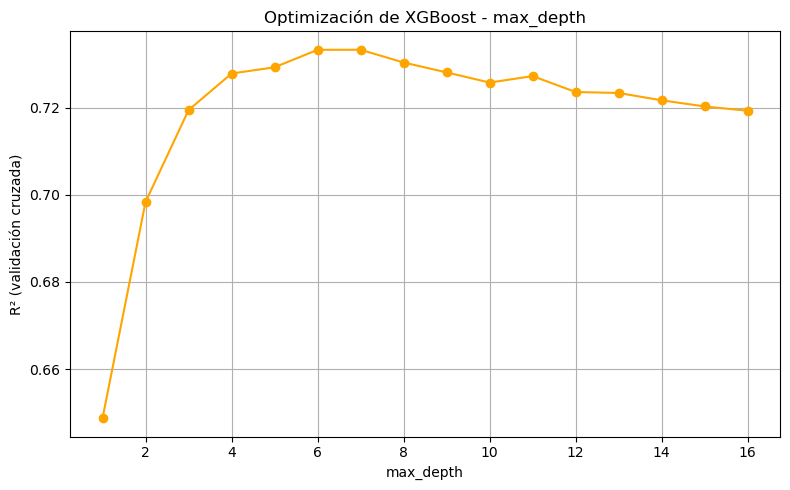

In [308]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np


maxDepth = range(1, 17)
tuned_parameters = {'max_depth': maxDepth}


grid_xgb = GridSearchCV(
    estimator=xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=0,
        n_estimators=200,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1
    ),
    param_grid=tuned_parameters,
    cv=3,
    scoring='r2',
    verbose=2
)


grid_xgb.fit(X_train_scaled, y_train) 


print(" Best mean cross-validation R²: {:.3f}".format(grid_xgb.best_score_))
print("Best parameters:", grid_xgb.best_params_)

# 5. Visualizar
scores = np.array(grid_xgb.cv_results_['mean_test_score'])

plt.figure(figsize=(8, 5))
plt.plot(maxDepth, scores, '-o', color='orange')
plt.xlabel('max_depth')
plt.ylabel('R² (validación cruzada)')
plt.title('Optimización de XGBoost - max_depth')
plt.grid(True)
plt.tight_layout()
plt.show()


XGBoost consigue mejorar los resultados de Randon Forest mejorando los errores residuales de cada arbol y al ser un modelo que reliza regularizacion baja el sesgo y favorece la optimizacion hasta alcanzar un R2 de 0,733

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END ........................................max_depth=4; total time=   0.1s
[CV] END .......................................

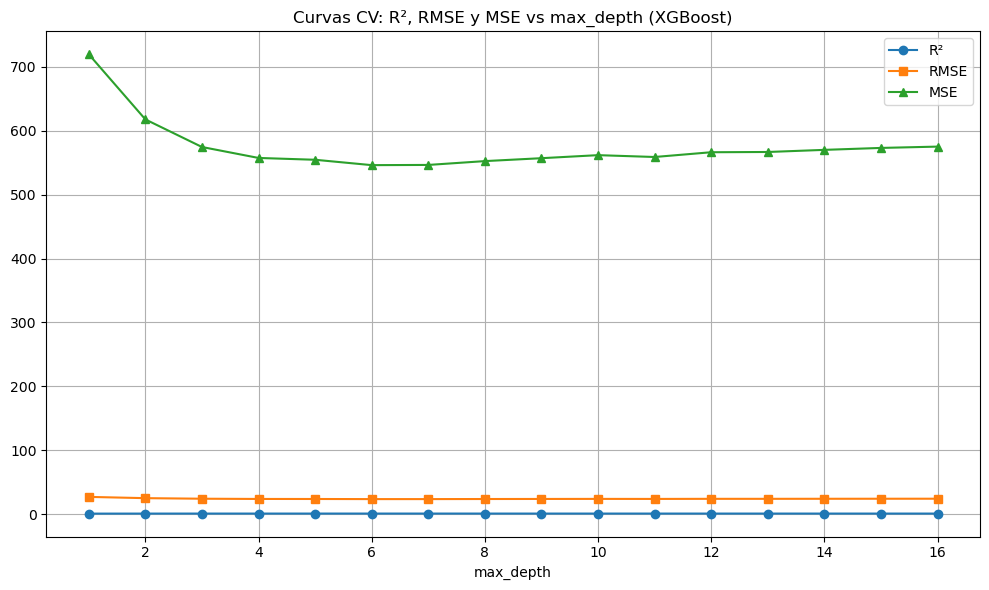

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

maxDepth = range(1, 17)
param_grid = {'max_depth': maxDepth}


scoring = {
    'R2': 'r2',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error'
}


grid_xgb = GridSearchCV(
    estimator=xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=0,
        n_estimators=200,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1
    ),
    param_grid=param_grid,
    scoring=scoring,
    refit='R2',      
    cv=3,
    verbose=2
)


grid_xgb.fit(X_train_scaled, y_train)


best_idx = grid_xgb.best_index_
cv_results = grid_xgb.cv_results_

best_r2   = cv_results['mean_test_R2'][best_idx]
best_mse  = -cv_results['mean_test_MSE'][best_idx]       
best_rmse = -cv_results['mean_test_RMSE'][best_idx]      

print("✅ Best max_depth:", grid_xgb.best_params_['max_depth'])
print(f"   → CV R²:   {best_r2:.3f}")
print(f"   → CV MSE:  {best_mse:.2f}")
print(f"   → CV RMSE: {best_rmse:.2f}")


mean_r2   = cv_results['mean_test_R2']
mean_mse  = -cv_results['mean_test_MSE']
mean_rmse = -cv_results['mean_test_RMSE']

plt.figure(figsize=(10, 6))
plt.plot(maxDepth, mean_r2,   '-o', label='R²')
plt.plot(maxDepth, mean_rmse, '-s', label='RMSE')
plt.plot(maxDepth, mean_mse,  '-^', label='MSE')
plt.xlabel('max_depth')
plt.title('Curvas CV: R², RMSE y MSE vs max_depth (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()